In [300]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import numpy as np #linear algebra
import pandas as pd # data processing 
import seaborn as sns #plot data 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import sklearn.metrics as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#show all columns at once 
pd.set_option('display.max_columns', None)




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler


In [301]:
# read the Excel file from your data folder into a data frame
df = pd.read_csv("/Users/markgonzalesnielsen/Desktop/out3.csv", index_col=None, na_values=['NA'])
df

,Unnamed: 0,Country,health,income,inflation,Region,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,0,Afghanistan,7.58,1610,9.44,Asia,0.00,65,42,23.3,67,65,0.03,3.6,0,32.49,1.910135e+10,9.7,47.9,64.5,638.0,0.28,38041754.0,11.120000,9797273.0,35.4,502.115487
1,1,Albania,6.55,9930,4.49,Rest of Europe,4.33,99,98,26.6,99,99,0.03,9.7,0,11.78,1.527808e+10,55.0,7.8,78.5,15.0,1.20,2854191.0,12.330000,1747593.0,83.7,5352.857411
2,2,Algeria,4.17,12900,16.10,Africa,0.55,95,99,25.5,95,95,0.05,7.9,0,24.28,1.699882e+11,51.4,20.1,76.7,112.0,1.72,43053054.0,11.700000,31510100.0,99.7,3948.343279
3,3,Angola,2.85,5900,22.40,Africa,6.53,64,64,23.2,62,64,0.89,5.0,0,40.73,9.463542e+10,9.3,51.6,60.8,241.0,0.21,31825295.0,6.890000,21061025.0,50.0,2973.591160
4,4,Antigua and Barbuda,6.03,19100,1.44,Central America and Caribbean,9.06,99,84,26.6,86,99,0.20,9.2,0,15.33,1.727759e+09,24.8,5.0,76.9,42.0,2.76,97118.0,6.886364,23800.0,100.0,17790.309304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,5.81,4240,16.50,Asia,2.59,99,99,26.7,99,99,0.14,11.4,0,23.30,5.792129e+10,10.1,19.1,71.6,29.0,2.37,33580650.0,5.920000,16935729.0,82.8,1724.841134
142,142,Vanuatu,5.25,2950,2.62,Oceania,1.42,64,65,26.1,80,64,0.17,6.8,0,29.60,9.170589e+08,4.7,22.3,70.3,72.0,0.17,299882.0,4.390000,76152.0,6.9,3058.065676
143,143,Venezuela,4.91,16500,45.90,South America,6.21,87,83,26.7,87,87,0.40,10.1,0,17.88,4.823593e+11,79.3,21.4,72.1,125.0,1.92,28515829.0,8.800000,25162368.0,95.5,16915.493453
144,144,Vietnam,6.84,4490,12.10,Asia,2.98,97,65,21.7,97,97,0.12,8.0,0,16.75,2.619212e+11,28.5,16.5,75.3,43.0,0.82,96462106.0,2.010000,35332140.0,96.1,2715.276036


In [315]:
df.rename(columns={'Life expectancy': 'Life_expectancy'},inplace=True)
df

,Unnamed: 0,Country,health,income,inflation,Region,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life_expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,0,Afghanistan,7.58,1610,9.44,Asia,0.00,65,42,23.3,67,65,0.03,3.6,0,32.49,1.910135e+10,9.7,47.9,64.5,638.0,0.28,38041754.0,11.120000,9797273.0,35.4,502.115487
1,1,Albania,6.55,9930,4.49,Rest of Europe,4.33,99,98,26.6,99,99,0.03,9.7,0,11.78,1.527808e+10,55.0,7.8,78.5,15.0,1.20,2854191.0,12.330000,1747593.0,83.7,5352.857411
2,2,Algeria,4.17,12900,16.10,Africa,0.55,95,99,25.5,95,95,0.05,7.9,0,24.28,1.699882e+11,51.4,20.1,76.7,112.0,1.72,43053054.0,11.700000,31510100.0,99.7,3948.343279
3,3,Angola,2.85,5900,22.40,Africa,6.53,64,64,23.2,62,64,0.89,5.0,0,40.73,9.463542e+10,9.3,51.6,60.8,241.0,0.21,31825295.0,6.890000,21061025.0,50.0,2973.591160
4,4,Antigua and Barbuda,6.03,19100,1.44,Central America and Caribbean,9.06,99,84,26.6,86,99,0.20,9.2,0,15.33,1.727759e+09,24.8,5.0,76.9,42.0,2.76,97118.0,6.886364,23800.0,100.0,17790.309304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,5.81,4240,16.50,Asia,2.59,99,99,26.7,99,99,0.14,11.4,0,23.30,5.792129e+10,10.1,19.1,71.6,29.0,2.37,33580650.0,5.920000,16935729.0,82.8,1724.841134
142,142,Vanuatu,5.25,2950,2.62,Oceania,1.42,64,65,26.1,80,64,0.17,6.8,0,29.60,9.170589e+08,4.7,22.3,70.3,72.0,0.17,299882.0,4.390000,76152.0,6.9,3058.065676
143,143,Venezuela,4.91,16500,45.90,South America,6.21,87,83,26.7,87,87,0.40,10.1,0,17.88,4.823593e+11,79.3,21.4,72.1,125.0,1.92,28515829.0,8.800000,25162368.0,95.5,16915.493453
144,144,Vietnam,6.84,4490,12.10,Asia,2.98,97,65,21.7,97,97,0.12,8.0,0,16.75,2.619212e+11,28.5,16.5,75.3,43.0,0.82,96462106.0,2.010000,35332140.0,96.1,2715.276036


In [316]:
df.rename(columns={'Clean fuel %': 'fuel'},inplace=True)
df

,Unnamed: 0,Country,health,income,inflation,Region,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life_expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,0,Afghanistan,7.58,1610,9.44,Asia,0.00,65,42,23.3,67,65,0.03,3.6,0,32.49,1.910135e+10,9.7,47.9,64.5,638.0,0.28,38041754.0,11.120000,9797273.0,35.4,502.115487
1,1,Albania,6.55,9930,4.49,Rest of Europe,4.33,99,98,26.6,99,99,0.03,9.7,0,11.78,1.527808e+10,55.0,7.8,78.5,15.0,1.20,2854191.0,12.330000,1747593.0,83.7,5352.857411
2,2,Algeria,4.17,12900,16.10,Africa,0.55,95,99,25.5,95,95,0.05,7.9,0,24.28,1.699882e+11,51.4,20.1,76.7,112.0,1.72,43053054.0,11.700000,31510100.0,99.7,3948.343279
3,3,Angola,2.85,5900,22.40,Africa,6.53,64,64,23.2,62,64,0.89,5.0,0,40.73,9.463542e+10,9.3,51.6,60.8,241.0,0.21,31825295.0,6.890000,21061025.0,50.0,2973.591160
4,4,Antigua and Barbuda,6.03,19100,1.44,Central America and Caribbean,9.06,99,84,26.6,86,99,0.20,9.2,0,15.33,1.727759e+09,24.8,5.0,76.9,42.0,2.76,97118.0,6.886364,23800.0,100.0,17790.309304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,5.81,4240,16.50,Asia,2.59,99,99,26.7,99,99,0.14,11.4,0,23.30,5.792129e+10,10.1,19.1,71.6,29.0,2.37,33580650.0,5.920000,16935729.0,82.8,1724.841134
142,142,Vanuatu,5.25,2950,2.62,Oceania,1.42,64,65,26.1,80,64,0.17,6.8,0,29.60,9.170589e+08,4.7,22.3,70.3,72.0,0.17,299882.0,4.390000,76152.0,6.9,3058.065676
143,143,Venezuela,4.91,16500,45.90,South America,6.21,87,83,26.7,87,87,0.40,10.1,0,17.88,4.823593e+11,79.3,21.4,72.1,125.0,1.92,28515829.0,8.800000,25162368.0,95.5,16915.493453
144,144,Vietnam,6.84,4490,12.10,Asia,2.98,97,65,21.7,97,97,0.12,8.0,0,16.75,2.619212e+11,28.5,16.5,75.3,43.0,0.82,96462106.0,2.010000,35332140.0,96.1,2715.276036


In [317]:
df.at[22,'fuel']='89.1'
df.at[73,'fuel']='90.2'
df.at[76,'fuel']='25.5'

In [318]:
#convert points column from object to float
df['fuel'] = df['fuel'].astype(float)

In [319]:
df.shape

(146, 27)

In [320]:
missing_counts = df.isnull().sum()
print(missing_counts)

Unnamed: 0                                 0
Country                                    0
health                                     0
income                                     0
inflation                                  0
Region                                     0
Alcohol_consumption                        0
Hepatitis_B                                0
Measles                                    0
BMI                                        0
Polio                                      0
Diphtheria                                 0
Incidents_HIV                              0
Schooling                                  0
Status                                     0
Birth Rate                                 0
GDP                                        0
Gross tertiary education enrollment (%)    0
Infant mortality                           0
Life_expectancy                            0
Maternal mortality ratio                   0
Physicians per thousand                    0
Population

In [321]:
df

,Unnamed: 0,Country,health,income,inflation,Region,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life_expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,0,Afghanistan,7.58,1610,9.44,Asia,0.00,65,42,23.3,67,65,0.03,3.6,0,32.49,1.910135e+10,9.7,47.9,64.5,638.0,0.28,38041754.0,11.120000,9797273.0,35.4,502.115487
1,1,Albania,6.55,9930,4.49,Rest of Europe,4.33,99,98,26.6,99,99,0.03,9.7,0,11.78,1.527808e+10,55.0,7.8,78.5,15.0,1.20,2854191.0,12.330000,1747593.0,83.7,5352.857411
2,2,Algeria,4.17,12900,16.10,Africa,0.55,95,99,25.5,95,95,0.05,7.9,0,24.28,1.699882e+11,51.4,20.1,76.7,112.0,1.72,43053054.0,11.700000,31510100.0,99.7,3948.343279
3,3,Angola,2.85,5900,22.40,Africa,6.53,64,64,23.2,62,64,0.89,5.0,0,40.73,9.463542e+10,9.3,51.6,60.8,241.0,0.21,31825295.0,6.890000,21061025.0,50.0,2973.591160
4,4,Antigua and Barbuda,6.03,19100,1.44,Central America and Caribbean,9.06,99,84,26.6,86,99,0.20,9.2,0,15.33,1.727759e+09,24.8,5.0,76.9,42.0,2.76,97118.0,6.886364,23800.0,100.0,17790.309304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,5.81,4240,16.50,Asia,2.59,99,99,26.7,99,99,0.14,11.4,0,23.30,5.792129e+10,10.1,19.1,71.6,29.0,2.37,33580650.0,5.920000,16935729.0,82.8,1724.841134
142,142,Vanuatu,5.25,2950,2.62,Oceania,1.42,64,65,26.1,80,64,0.17,6.8,0,29.60,9.170589e+08,4.7,22.3,70.3,72.0,0.17,299882.0,4.390000,76152.0,6.9,3058.065676
143,143,Venezuela,4.91,16500,45.90,South America,6.21,87,83,26.7,87,87,0.40,10.1,0,17.88,4.823593e+11,79.3,21.4,72.1,125.0,1.92,28515829.0,8.800000,25162368.0,95.5,16915.493453
144,144,Vietnam,6.84,4490,12.10,Asia,2.98,97,65,21.7,97,97,0.12,8.0,0,16.75,2.619212e+11,28.5,16.5,75.3,43.0,0.82,96462106.0,2.010000,35332140.0,96.1,2715.276036


In [322]:
corr = df.corr(numeric_only=True)

<Axes: >

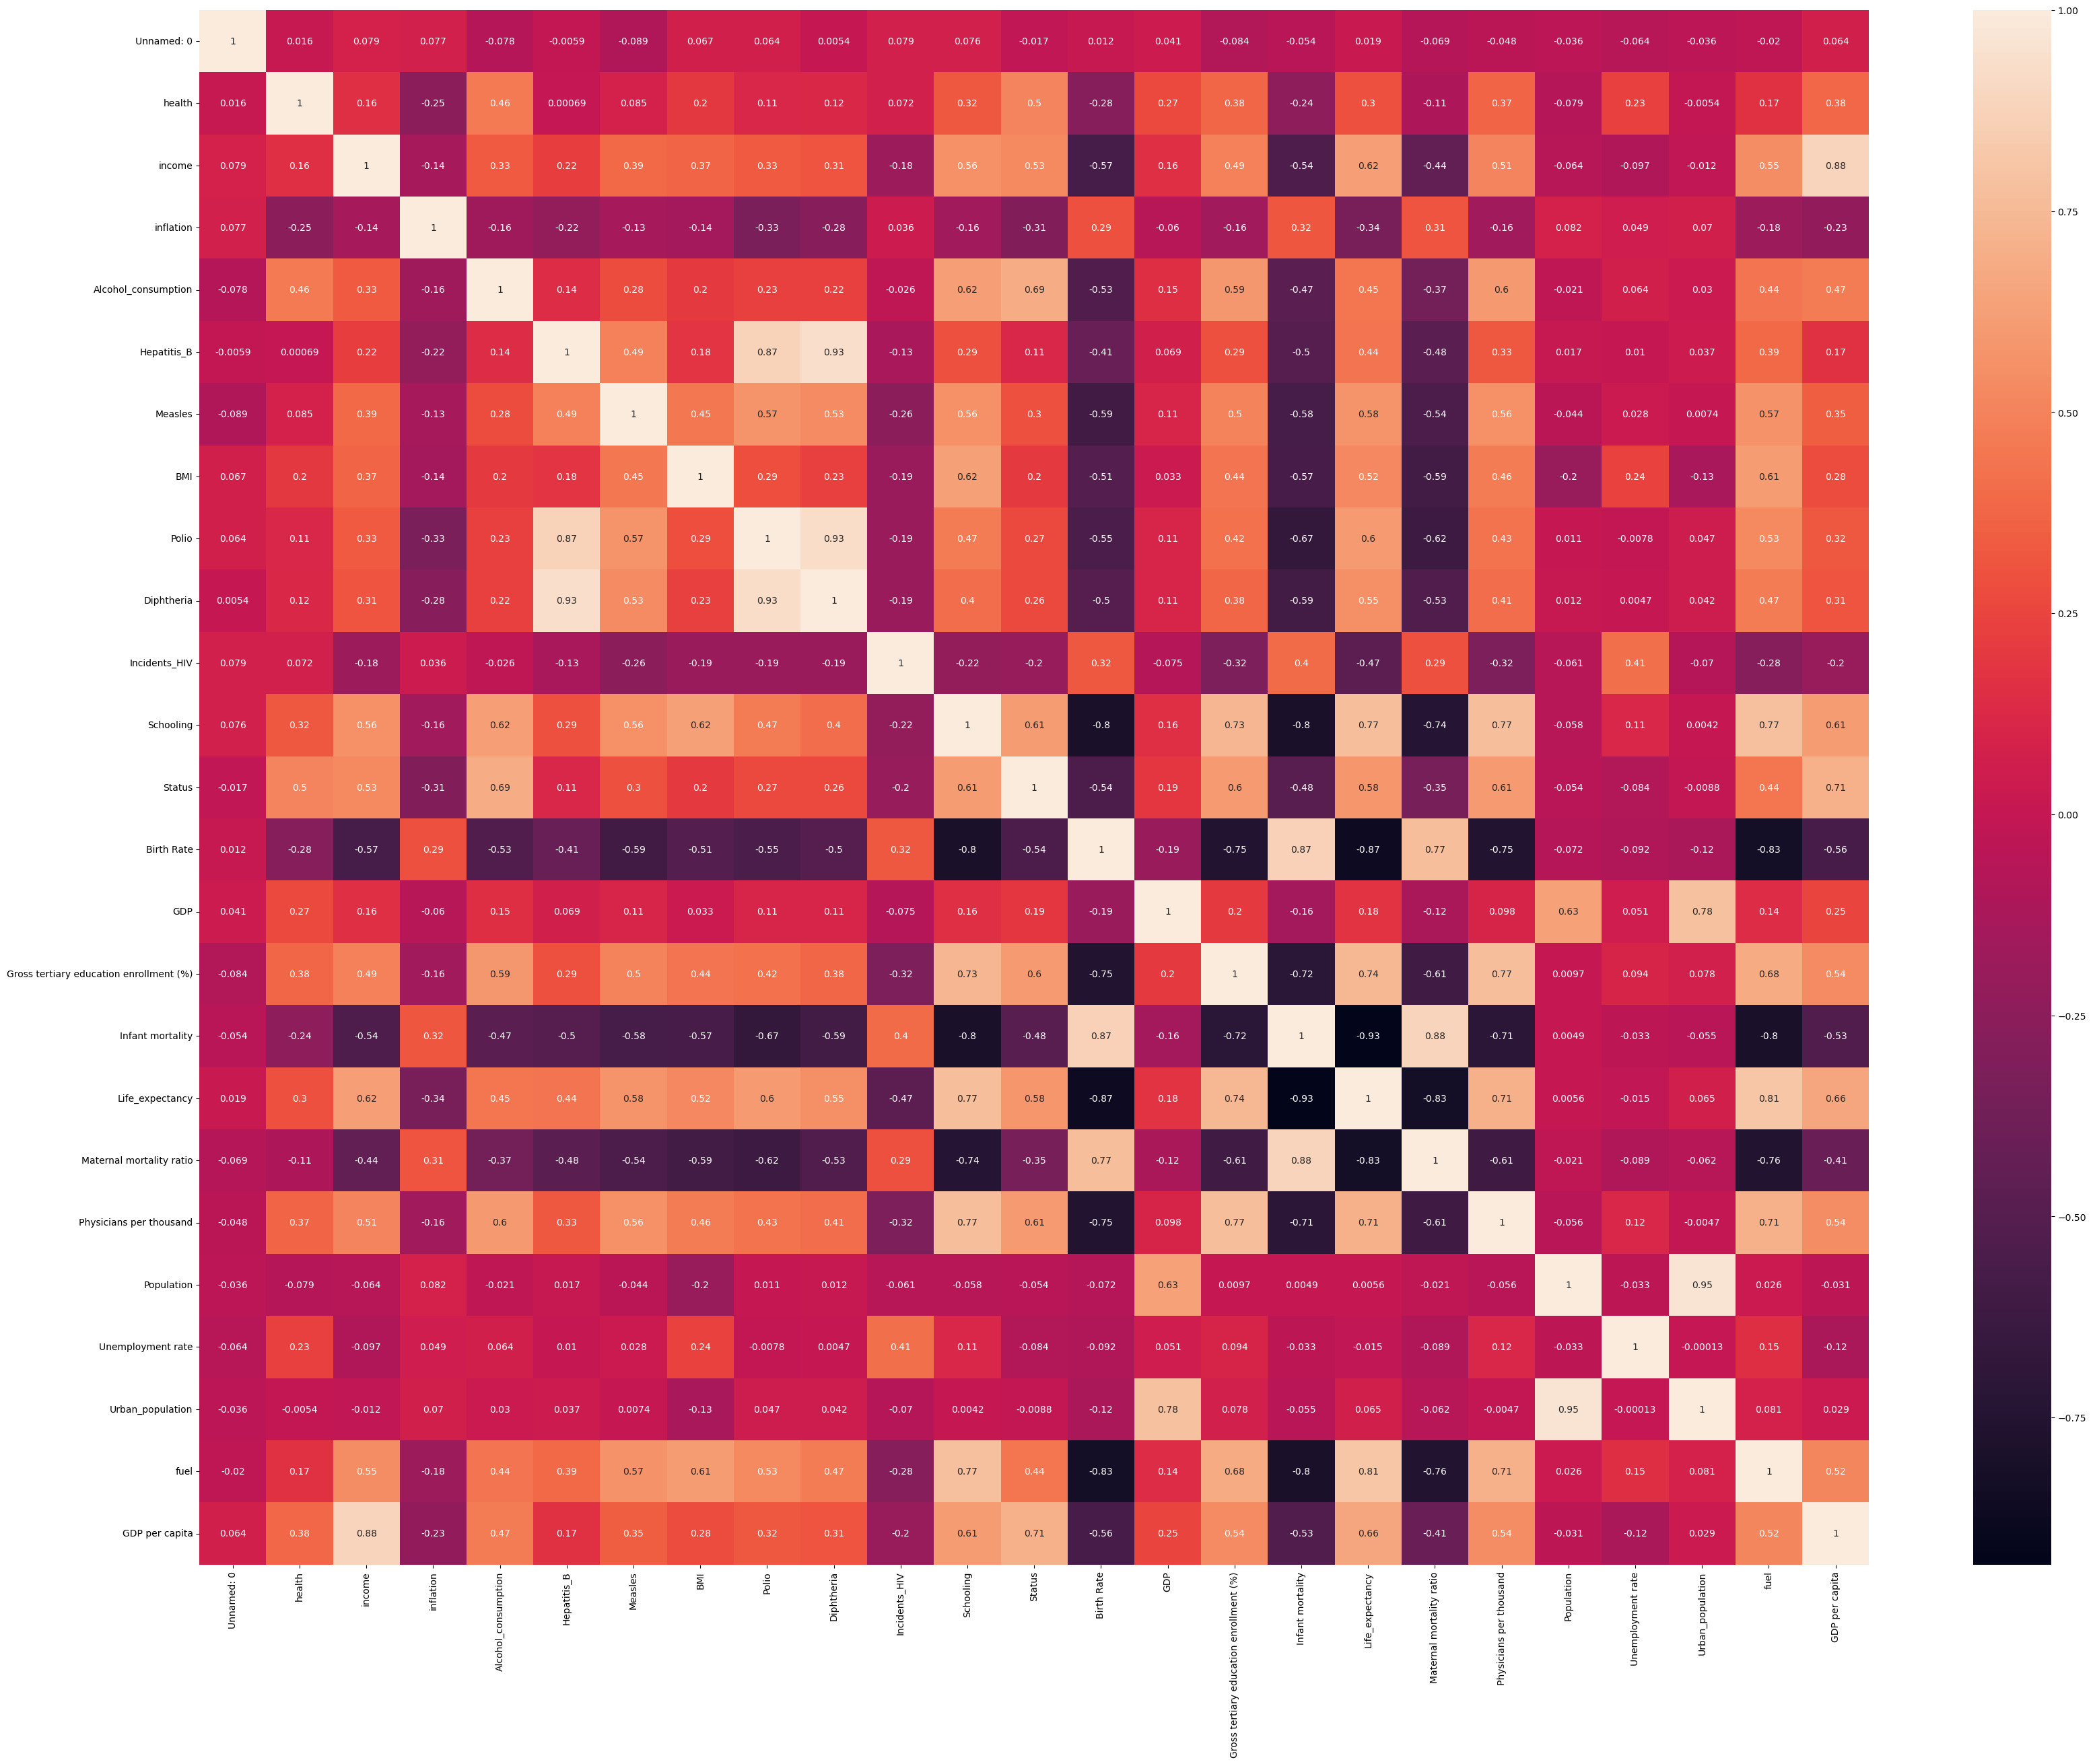

In [323]:
#data = data.drop('date',axis=1) (need to remove 'date' before calling data.corr() since date contains non-intable data) 
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix, annot=True)

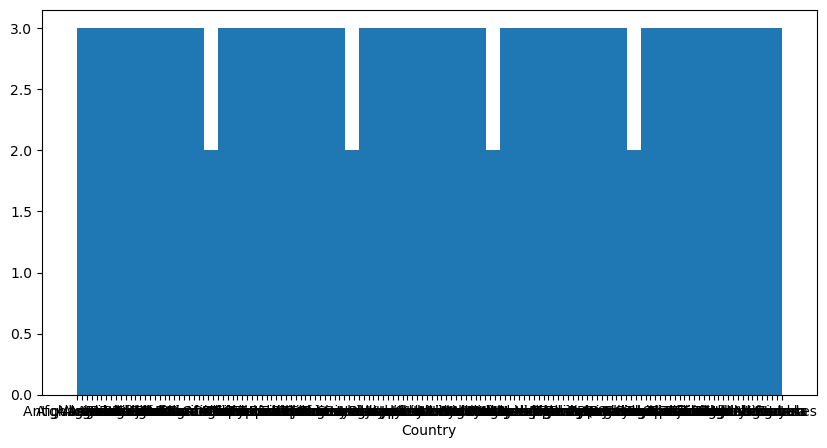

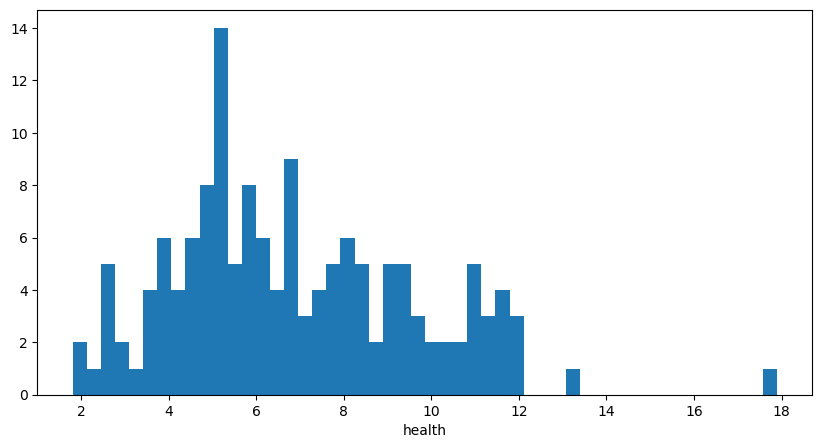

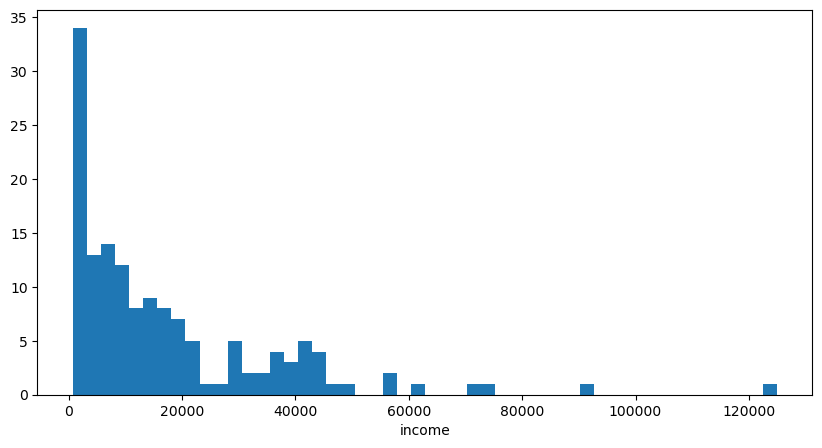

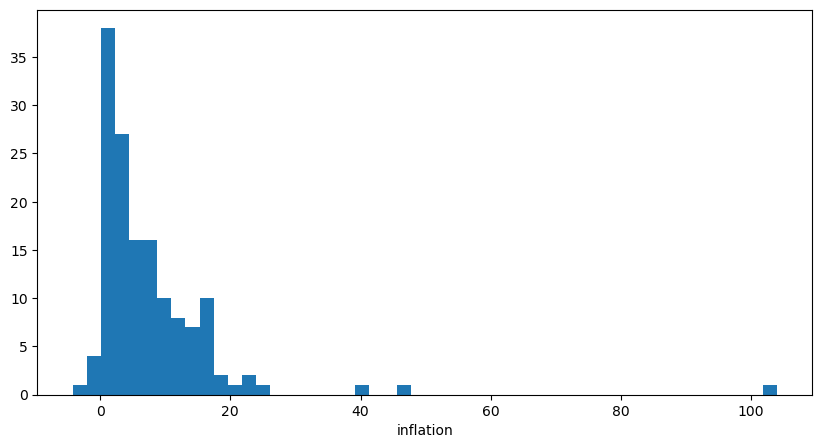

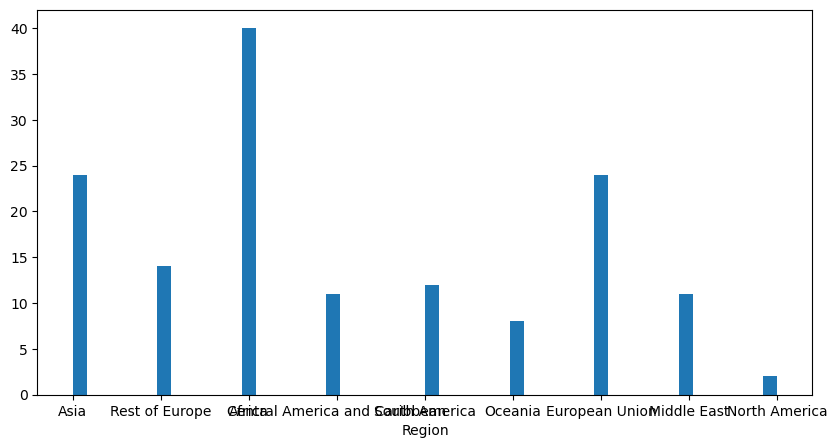

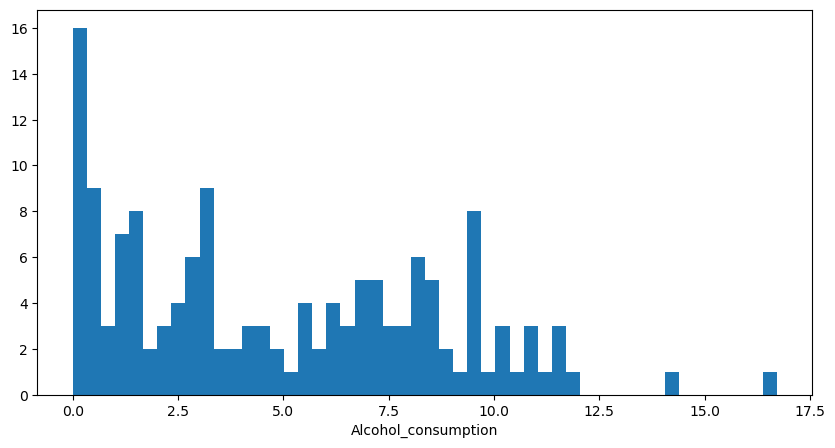

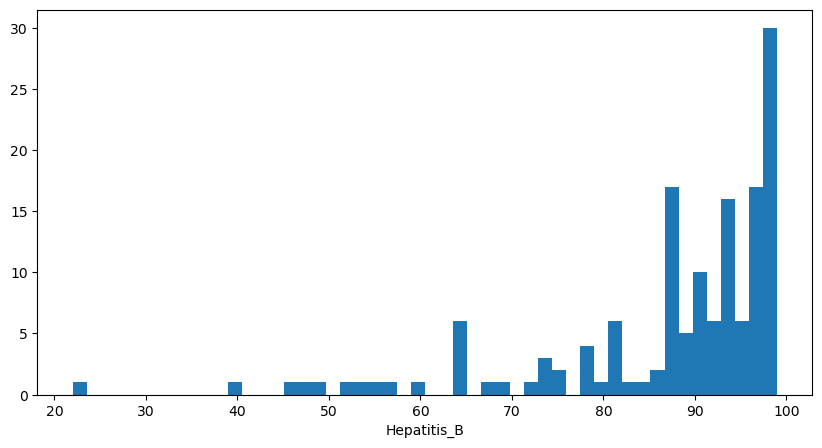

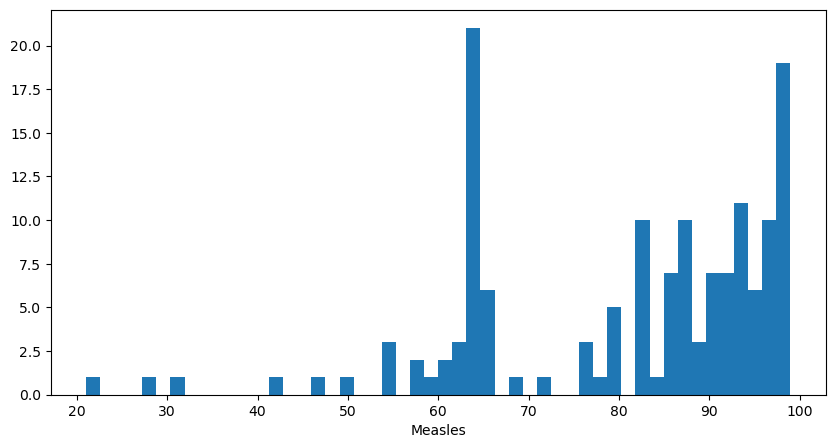

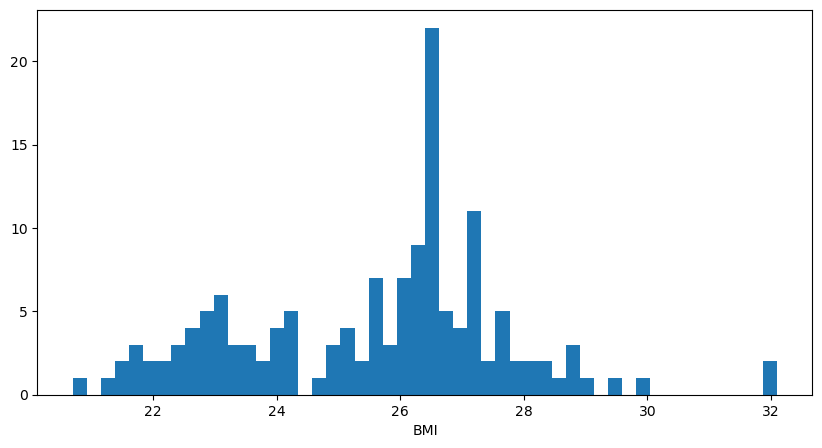

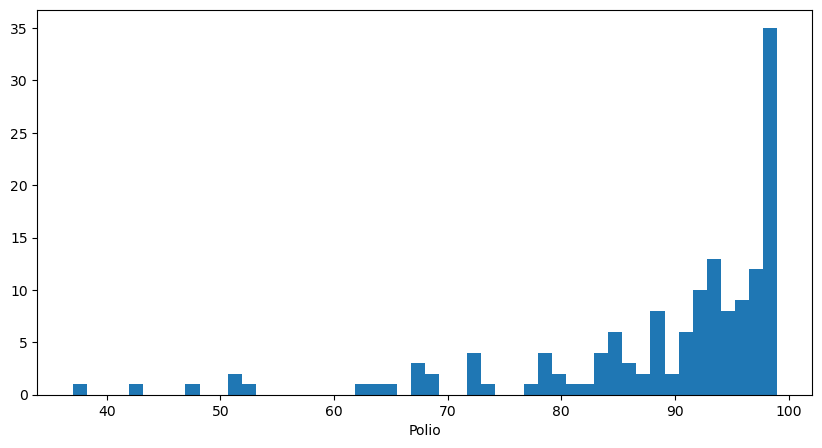

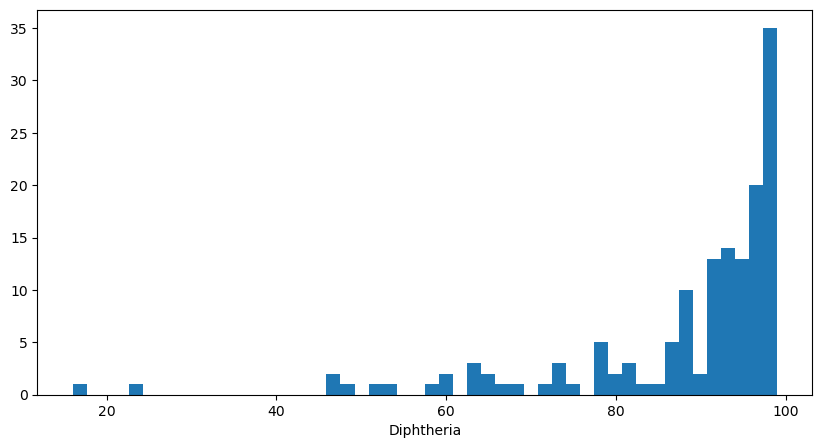

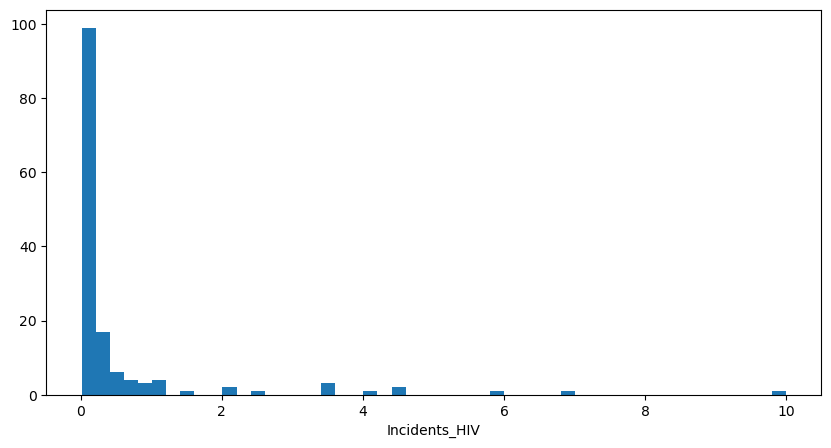

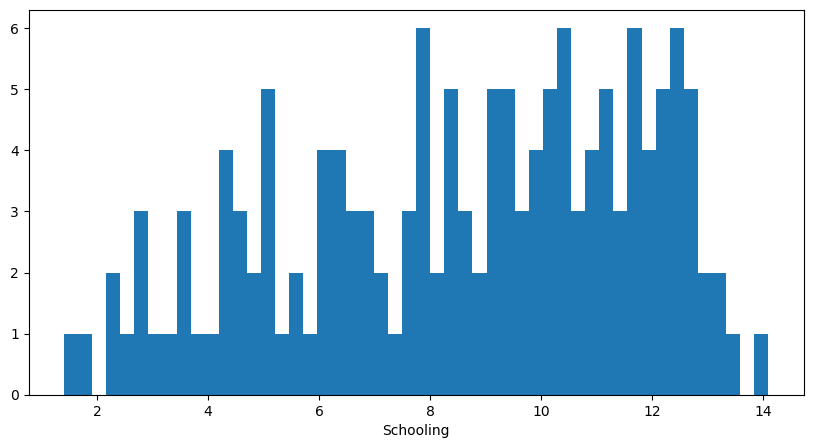

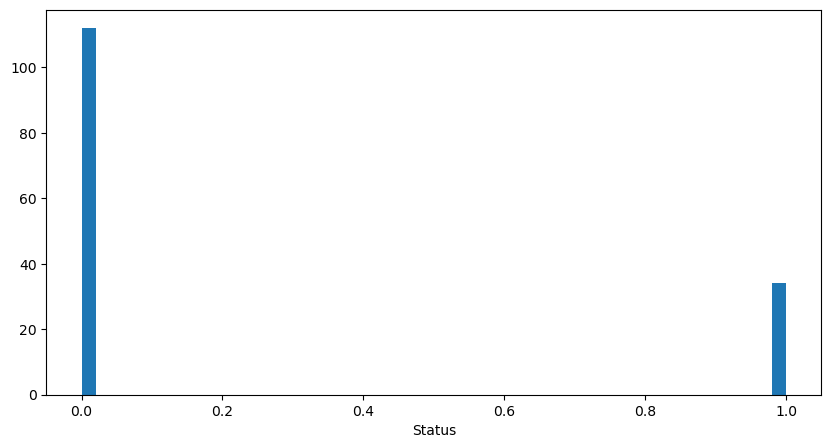

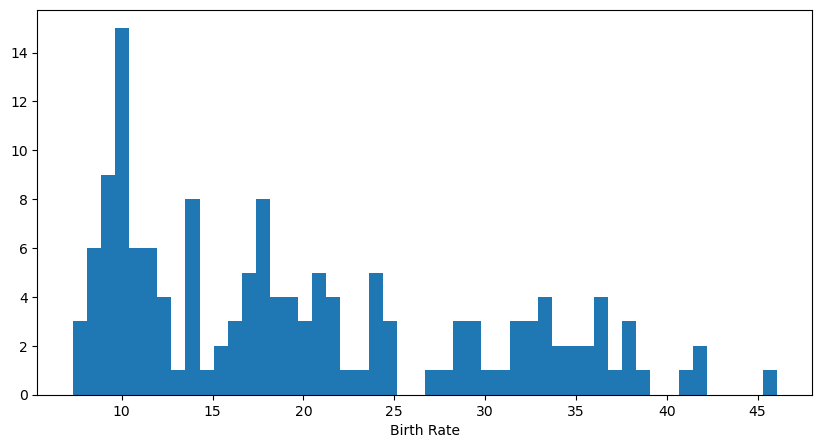

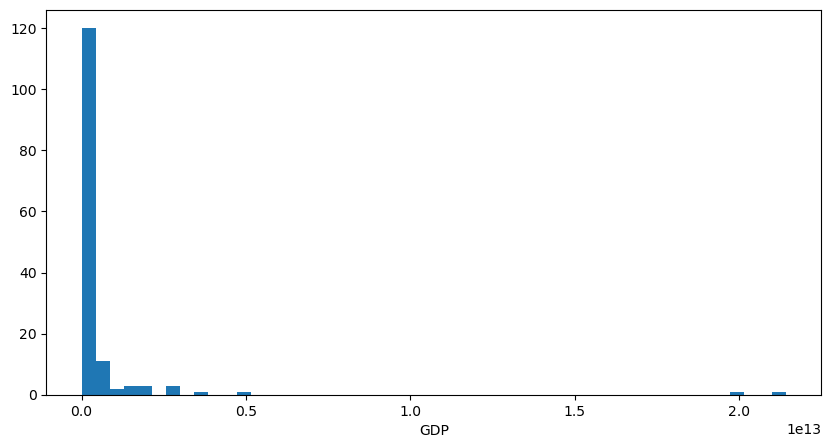

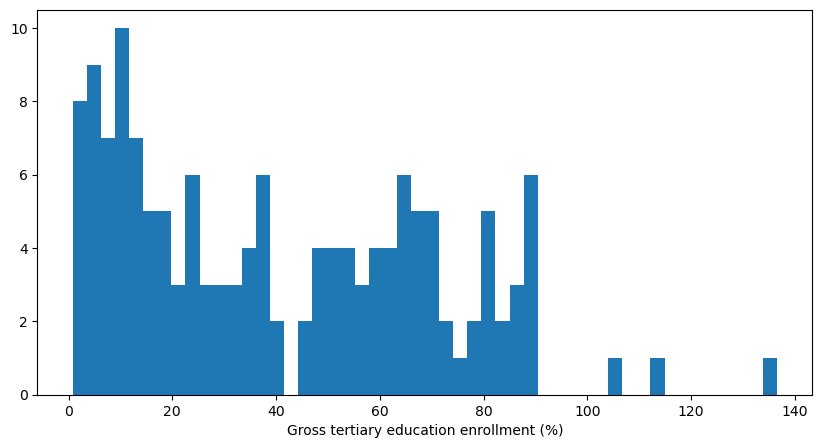

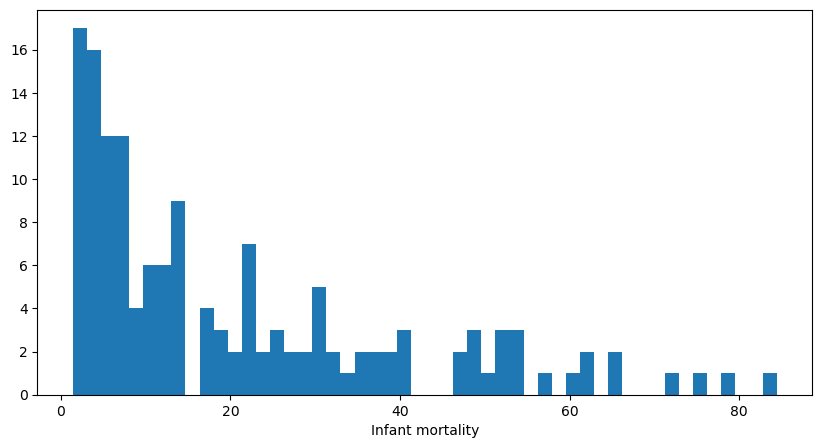

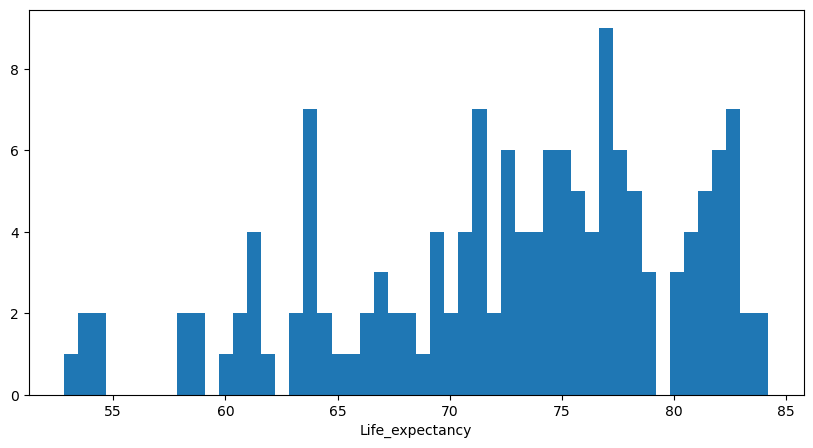

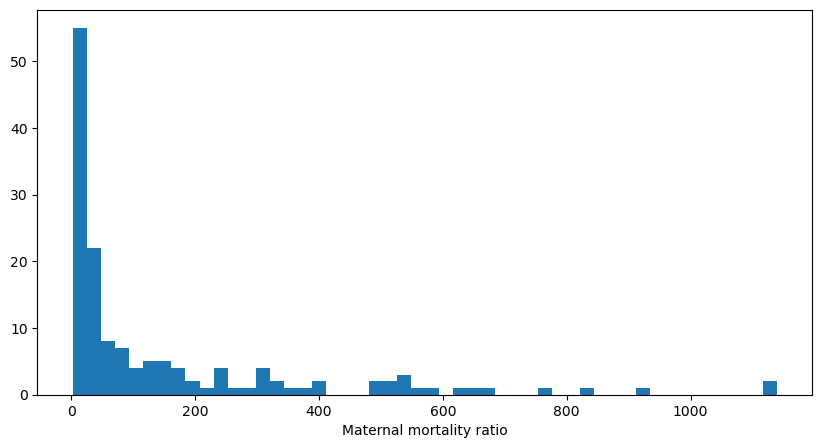

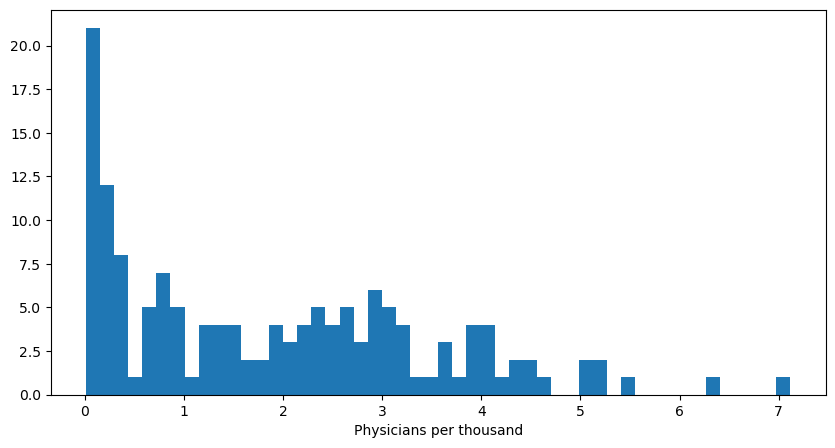

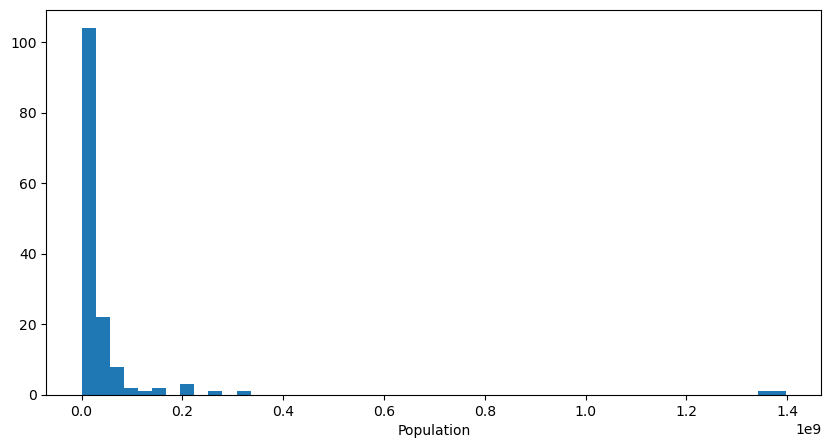

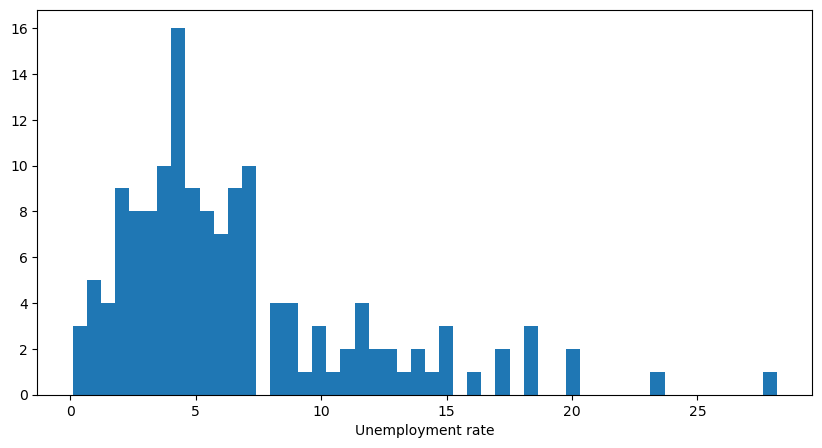

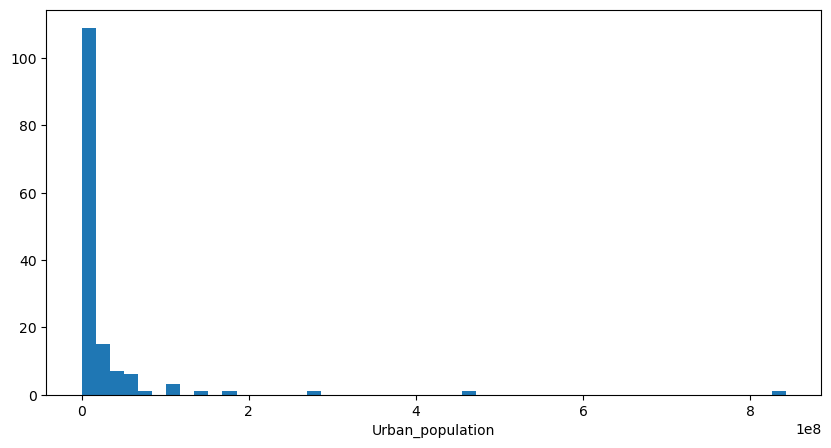

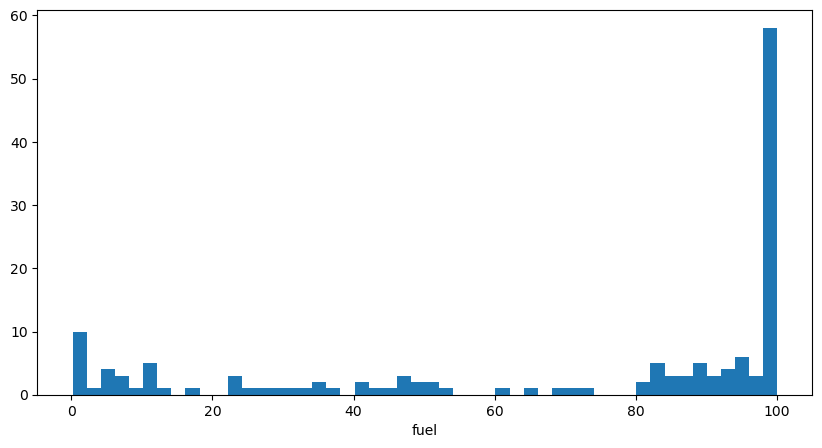

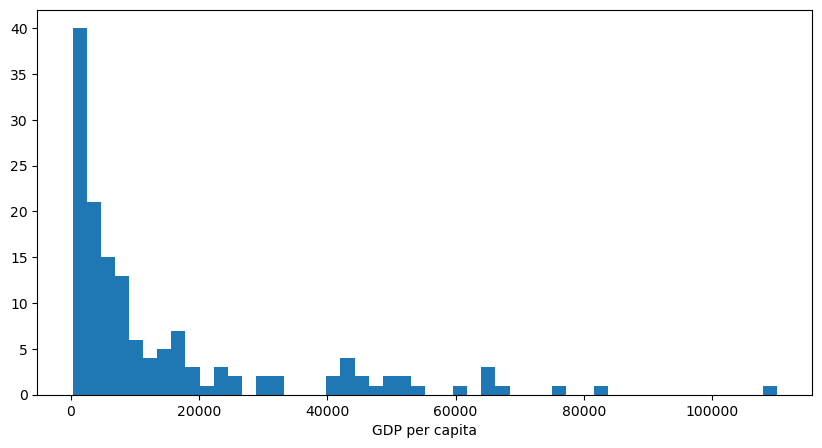

In [324]:
plt.rcParams["figure.figsize"] = [10,5]  #set the graph to a smaller size 
no_of_columns = 5                # in-case you want to try with a smaller subset of graphs to save execution time / CPU consumption
for i in range(1,df.shape[1]) :
    col_name = df.columns[i]  # get the column name to identify the graph
    x=df[col_name]
    plt.xlabel(col_name)         # The column name will be the x-label ( just to identify )
    k=plt.hist(x,bins=50)       # Change the right number of bins to get it more/less granular 
    plt.show()

In [325]:
print(df.dtypes,"\n")

Unnamed: 0                                   int64
Country                                     object
health                                     float64
income                                       int64
inflation                                  float64
Region                                      object
Alcohol_consumption                        float64
Hepatitis_B                                  int64
Measles                                      int64
BMI                                        float64
Polio                                        int64
Diphtheria                                   int64
Incidents_HIV                              float64
Schooling                                  float64
Status                                       int64
Birth Rate                                 float64
GDP                                        float64
Gross tertiary education enrollment (%)    float64
Infant mortality                           float64
Life_expectancy                

In [326]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,146.0,7.250000e+01,4.229066e+01,0.000000e+00,3.625000e+01,7.250000e+01,1.087500e+02,1.450000e+02
health,146.0,6.862740e+00,2.770527e+00,1.810000e+00,4.940000e+00,6.400000e+00,8.710000e+00,1.790000e+01
income,146.0,1.743626e+04,1.932569e+04,7.000000e+02,3.767500e+03,1.070000e+04,2.260000e+04,1.250000e+05
inflation,146.0,7.584856e+00,1.077375e+01,-4.210000e+00,1.790000e+00,5.290000e+00,9.717500e+00,1.040000e+02
Alcohol_consumption,146.0,4.879863e+00,3.774906e+00,0.000000e+00,1.432500e+00,4.245000e+00,8.045000e+00,1.672000e+01
Hepatitis_B,146.0,8.721233e+01,1.408653e+01,2.200000e+01,8.450000e+01,9.200000e+01,9.700000e+01,9.900000e+01
Measles,146.0,8.093836e+01,1.652385e+01,2.100000e+01,6.400000e+01,8.650000e+01,9.400000e+01,9.900000e+01
BMI,146.0,2.557808e+01,2.150012e+00,2.070000e+01,2.382500e+01,2.615000e+01,2.687500e+01,3.210000e+01
Polio,146.0,8.882877e+01,1.254804e+01,3.700000e+01,8.500000e+01,9.300000e+01,9.700000e+01,9.900000e+01
Diphtheria,146.0,8.816438e+01,1.473912e+01,1.600000e+01,8.700000e+01,9.400000e+01,9.700000e+01,9.900000e+01


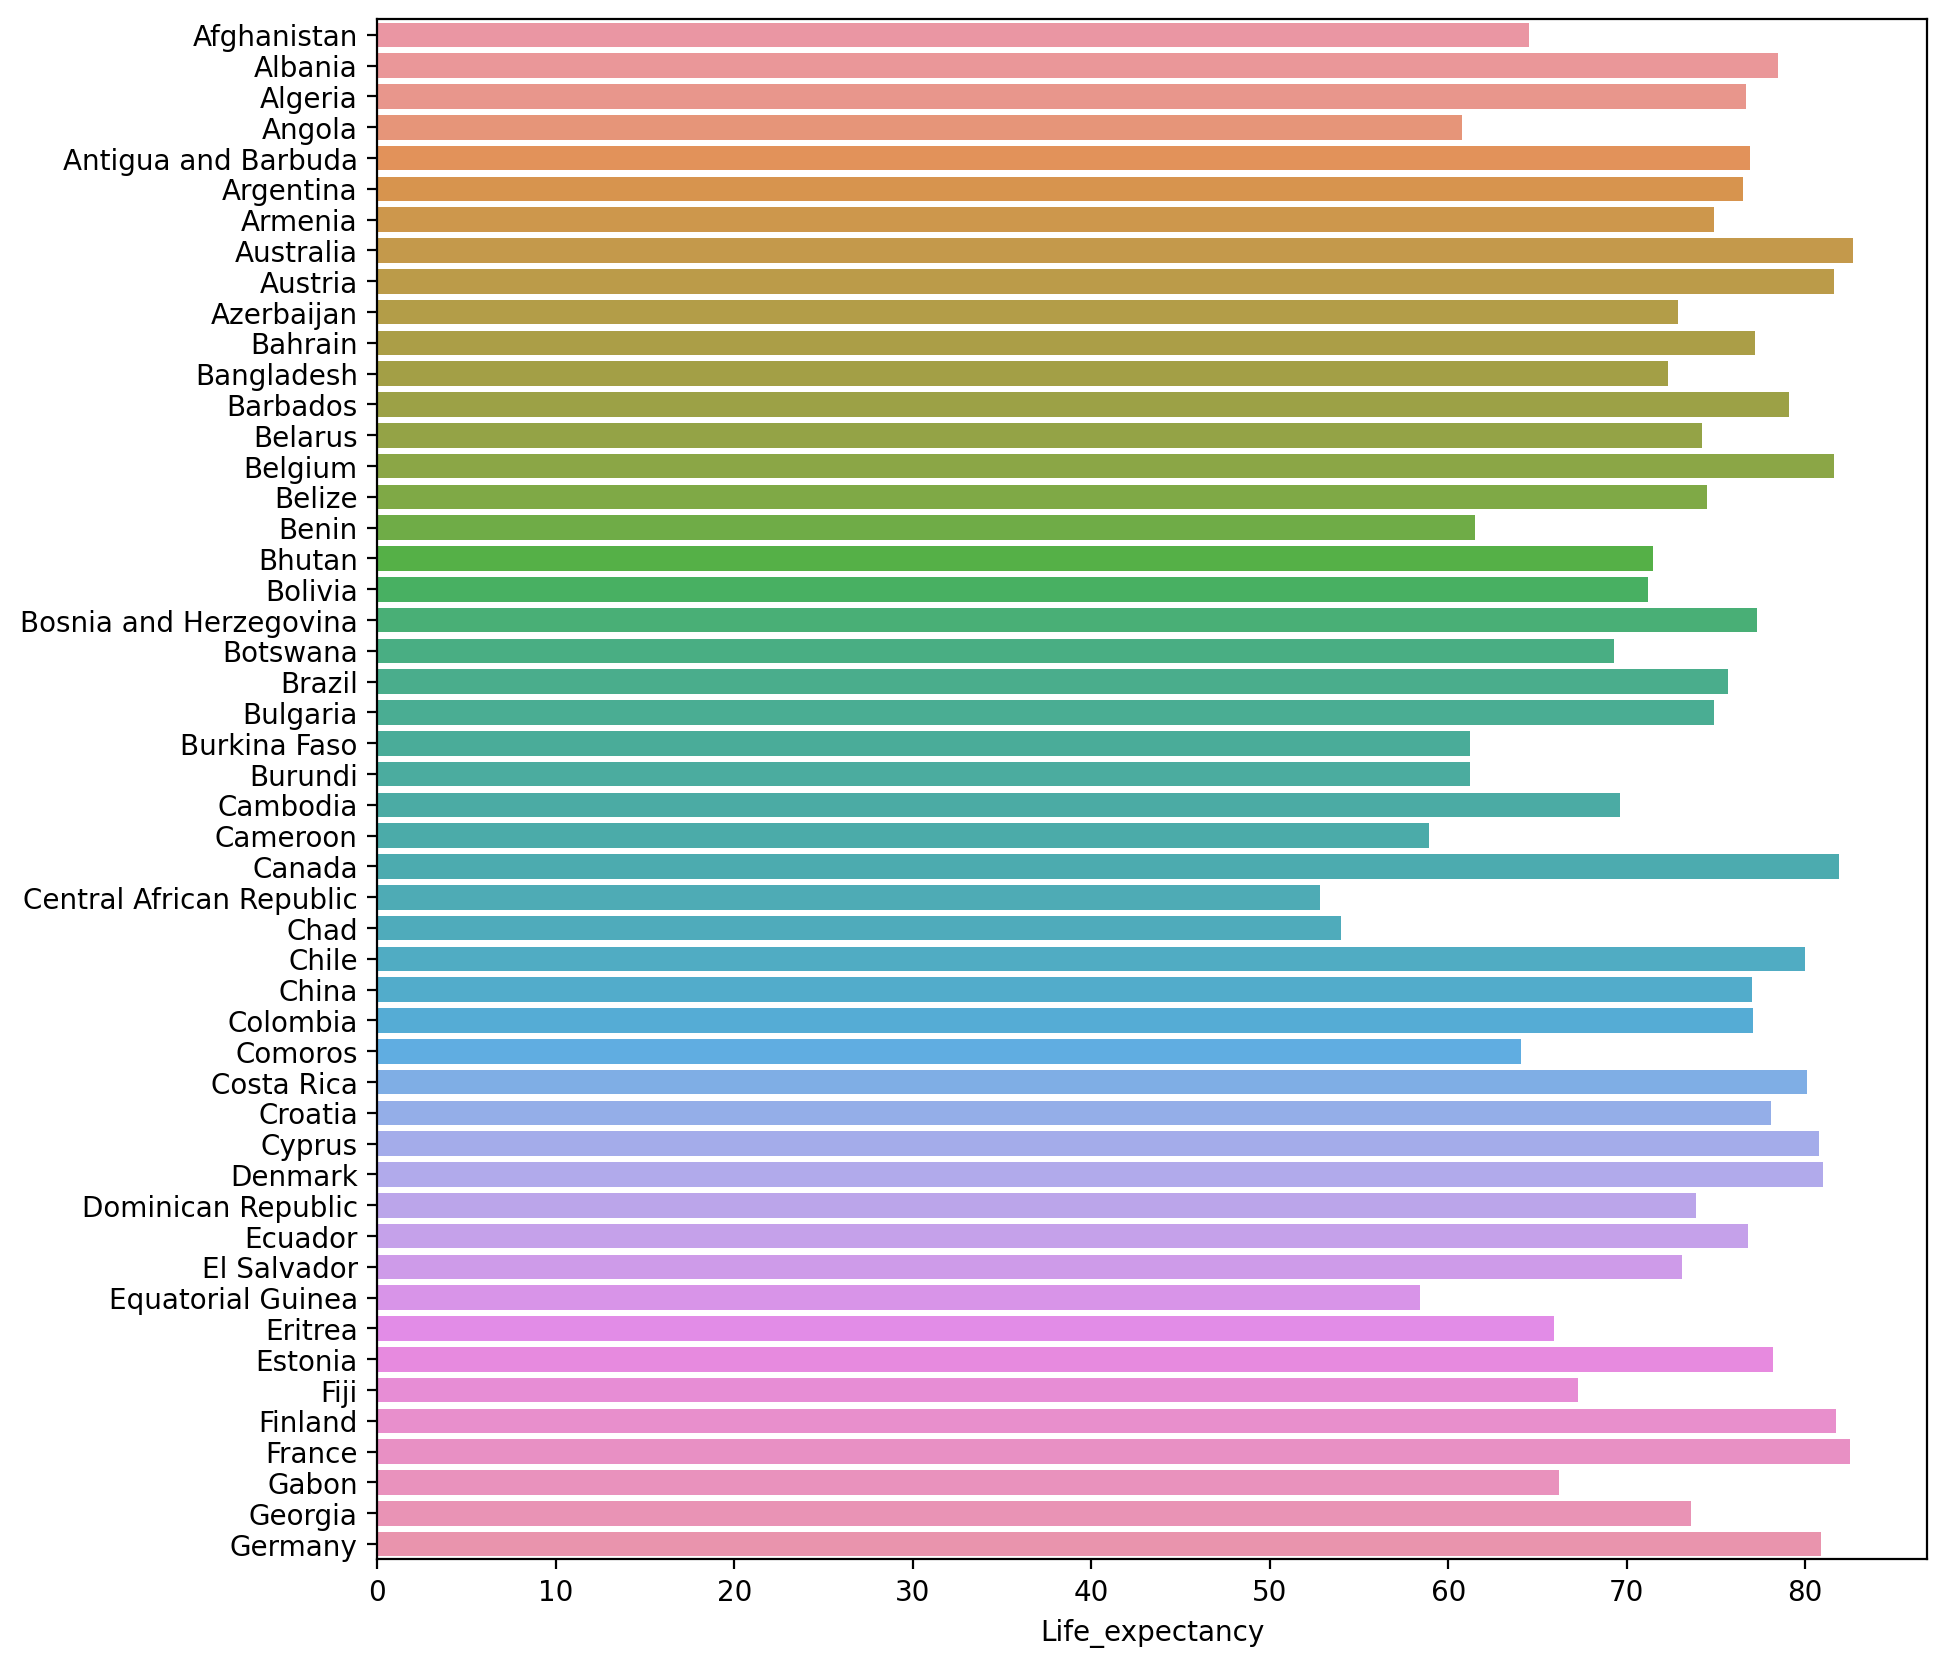

In [327]:
plt.figure(figsize=(10, 10), dpi=200)
sns.barplot(y=df.sort_values(by='Country')['Country'].unique()[0:50], x=df.groupby('Country')['Life_expectancy'].max()[0:50]);

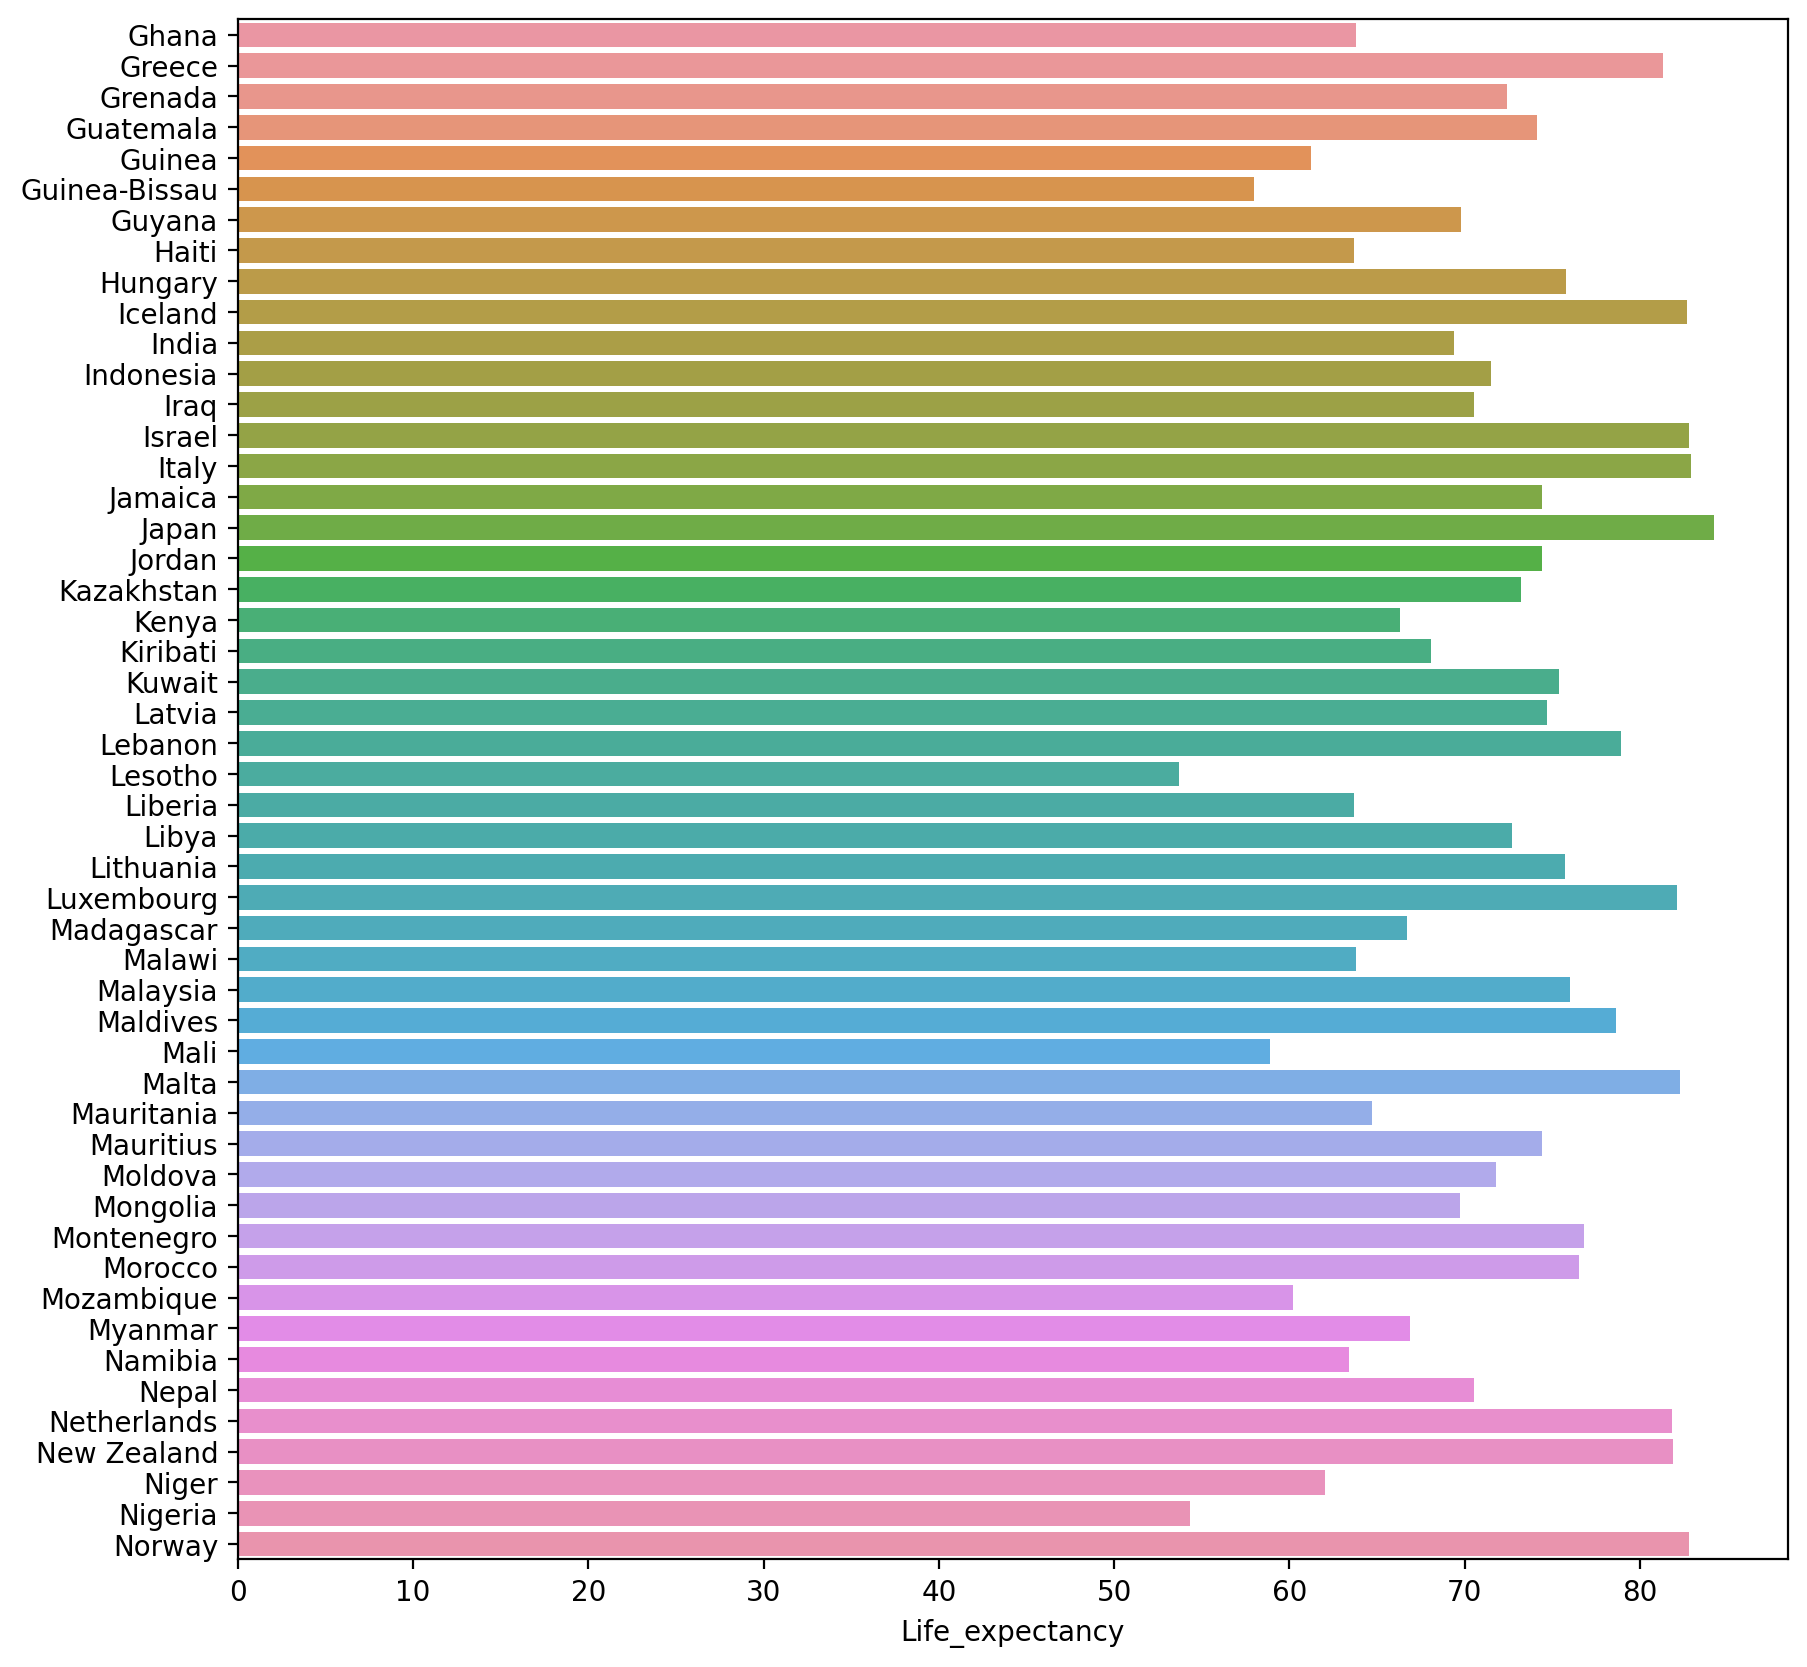

In [328]:
plt.figure(figsize=(10, 10), dpi=200)
sns.barplot(y=df.sort_values(by='Country')['Country'].unique()[50:100], x=df.groupby('Country')['Life_expectancy'].max()[50:100]);

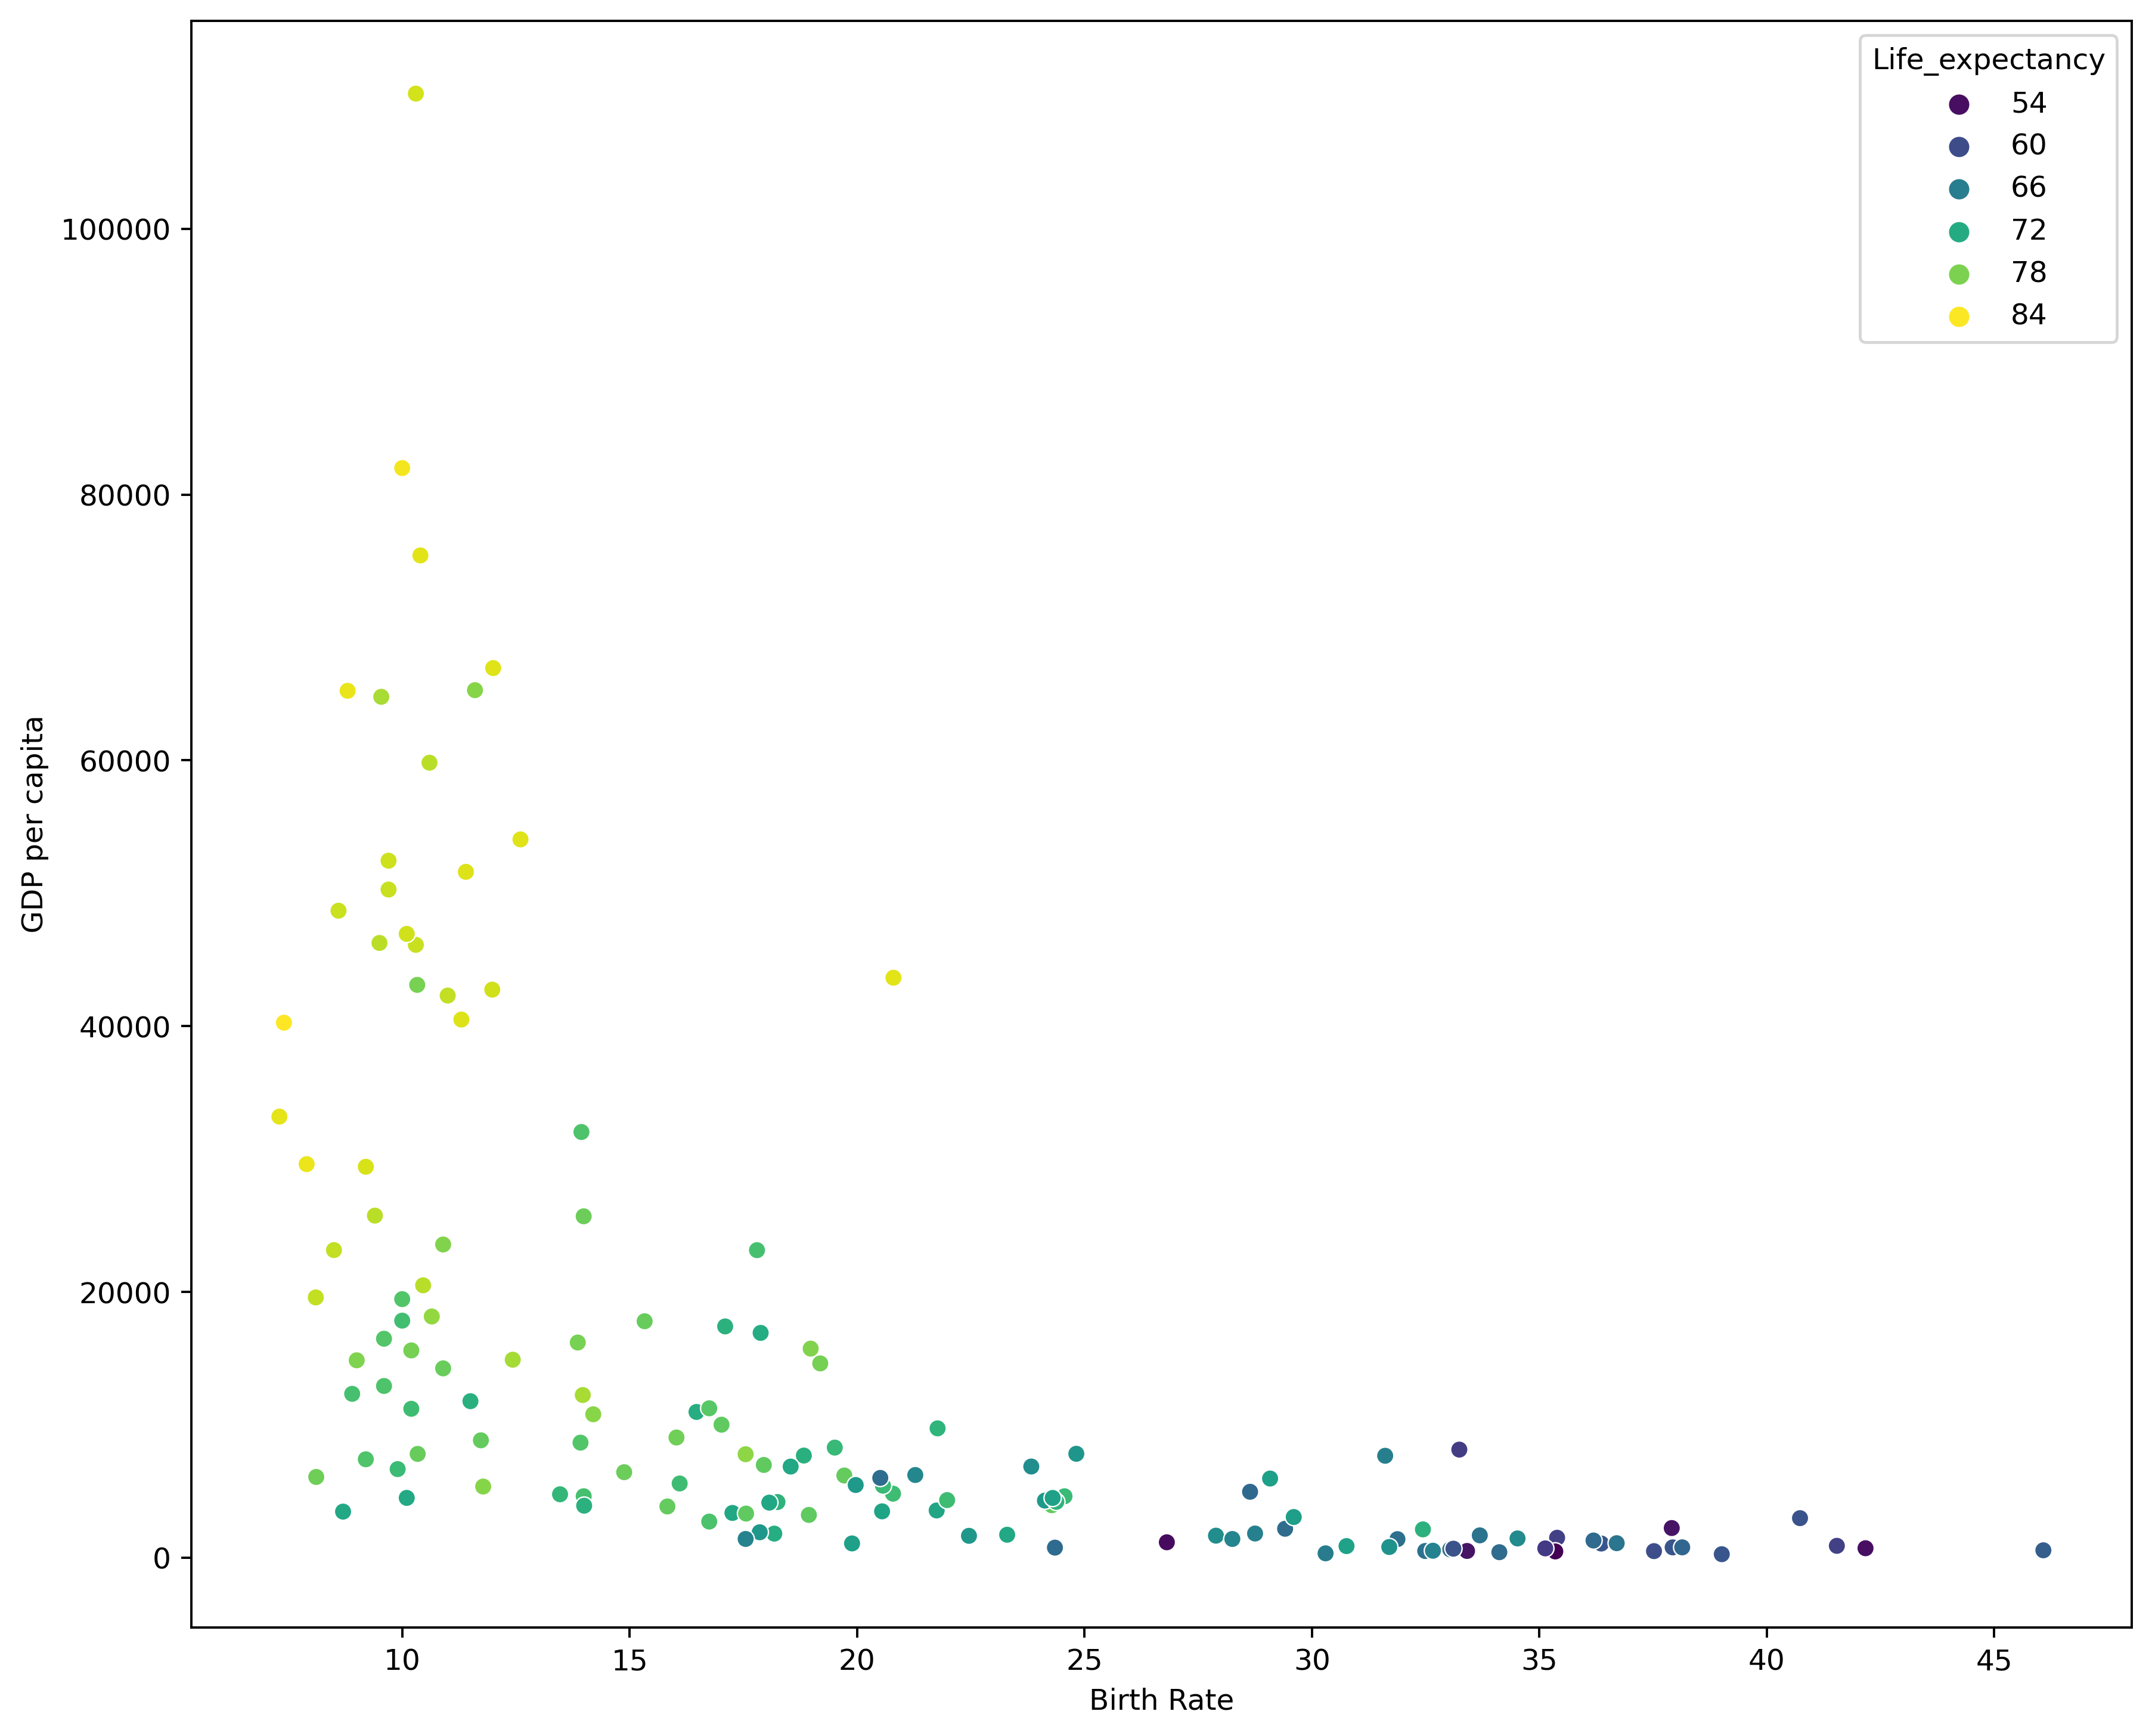

In [329]:
plt.figure(figsize=(12, 10), dpi=350)
sns.scatterplot(x=df['Birth Rate'], y=df['GDP per capita'], hue=df['Life_expectancy'], palette='viridis');


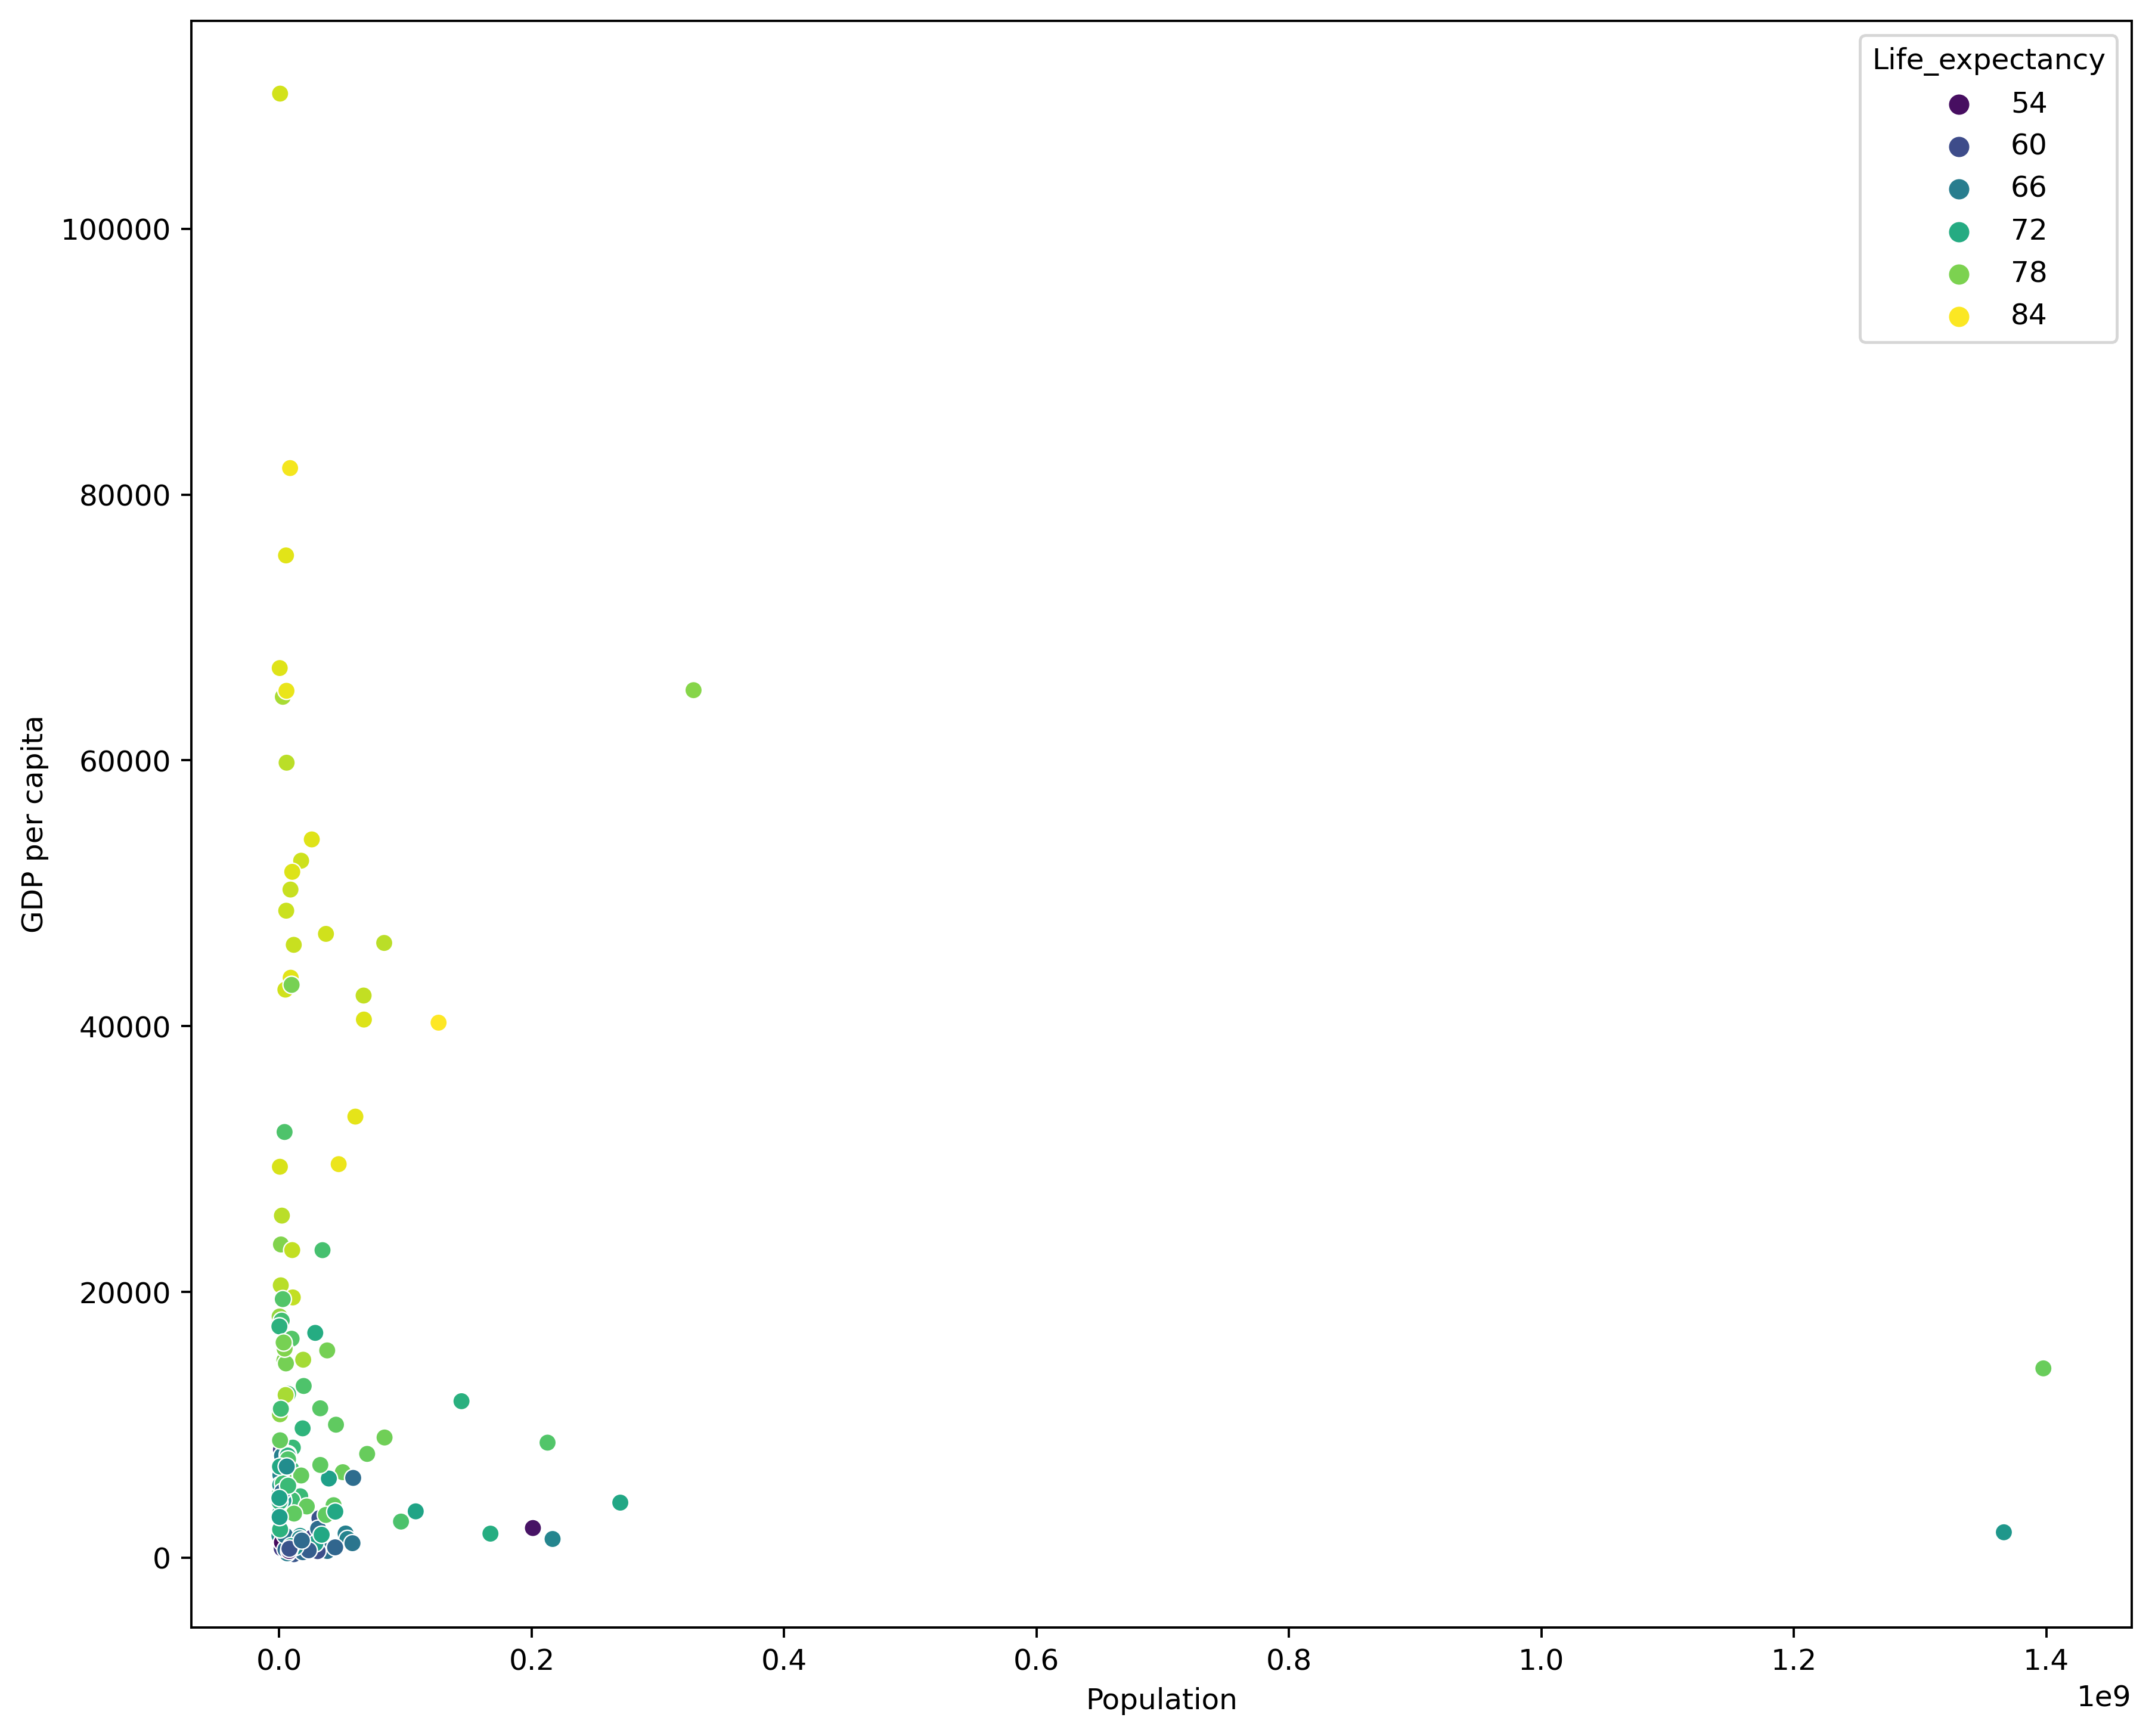

In [330]:
plt.figure(figsize=(12, 10), dpi=350)
sns.scatterplot(x=df['Population'], y=df['GDP per capita'], hue=df['Life_expectancy'], palette='viridis');

# Train a model
#multilineær

In [331]:
# use the list to select a subset of the original DataFrame
X = df[['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio']]

In [332]:
# select a Series from the DataFrame for y
y = df.Life_expectancy

# print the first 5 values
y.head()

0    64.5
1    78.5
2    76.7
3    60.8
4    76.9
Name: Life_expectancy, dtype: float64

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [334]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(109, 6)
(109,)
(37, 6)
(37,)


In [335]:
# create a model
linreg  = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [336]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 52.35859675432707
bi = [ 2.57938757e-01  1.15016010e-04  7.38782020e-02 -1.84099035e-05
  4.19418259e-01  1.11081101e-01]


In [337]:
# pair the feature names with the coefficients
list(zip(['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio'], linreg.coef_))

[('Physicians per thousand', 0.2579387569229863),
 ('GDP per capita', 0.00011501600978305968),
 ('fuel', 0.07387820201959255),
 ('income', -1.8409903456417798e-05),
 ('Schooling', 0.41941825917708947),
 ('Polio', 0.11108110095950374)]

In [338]:
y_test

98     54.3
66     84.2
53     74.1
75     63.7
121    63.9
74     53.7
119    81.0
128    65.0
44     67.3
58     75.8
5      76.5
16     61.5
90     76.5
14     81.6
97     62.0
33     64.1
127    70.9
29     54.0
130    60.8
35     78.1
73     78.9
83     58.9
31     77.0
122    83.3
48     73.6
19     77.3
141    71.6
116    72.8
92     66.9
78     82.1
124    71.6
51     81.3
42     65.9
108    80.1
28     52.8
40     73.1
104    76.5
Name: Life_expectancy, dtype: float64

In [339]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [340]:
y_predicted

array([61.04134152, 80.57917447, 66.71718986, 61.5228182 , 73.27151041,
       67.50271104, 78.56123277, 66.05414115, 72.47944322, 78.05658581,
       76.00791008, 62.29162302, 73.14724867, 80.99002327, 62.61403549,
       65.63005225, 74.24266594, 59.74689655, 64.35678164, 76.99766254,
       72.72194598, 60.93373746, 74.70545113, 78.39558828, 76.74811204,
       68.50711586, 74.98575024, 76.37671357, 67.78250056, 87.53625932,
       72.38879882, 78.32672481, 65.42346862, 80.64571092, 59.90472515,
       72.94690022, 73.21379238])

In [341]:
# calculate MAE using scikit-learn
from sklearn import metrics

In [342]:
print(metrics.mean_absolute_error(y_test, y_predicted))

3.5439418647733736


In [343]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

21.435375082918444


In [344]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

4.629835319200721


In [345]:
# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.75


In [346]:
# R-squared
r2_score(y_test, y_predicted)

0.7387189978882482

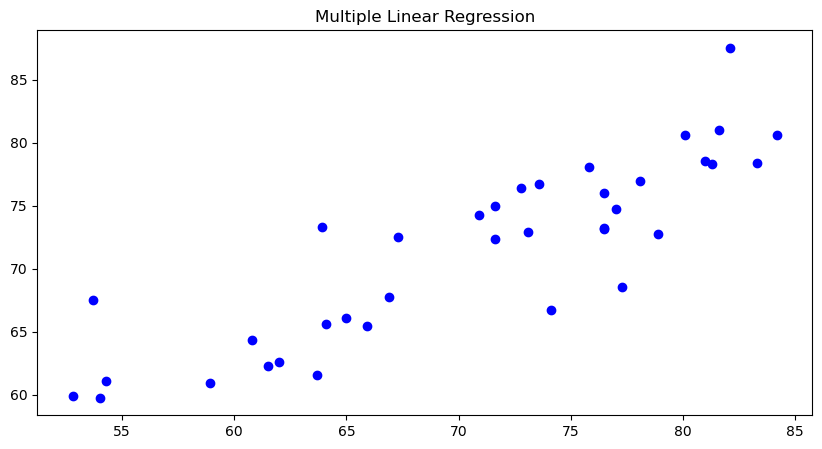

In [347]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')

In [348]:
# use the list to select a subset of the original DataFrame
X = df[['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio']]

# select a Series from the DataFrame
y = df.Life_expectancy

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_predicted = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

4.629835319200721


In [349]:
# R-squared
r2_score(y_test, y_predicted)

0.7387189978882482

In [350]:
#very gub sammenhæng 

# Lineær

In [351]:
#vælg den bedste coef og sæt den ind i lineær

In [352]:
X = df['fuel'].values.reshape(-1,1)
y = df['Life expectancy'].values.reshape(-1,1)

KeyError: 'Life expectancy'

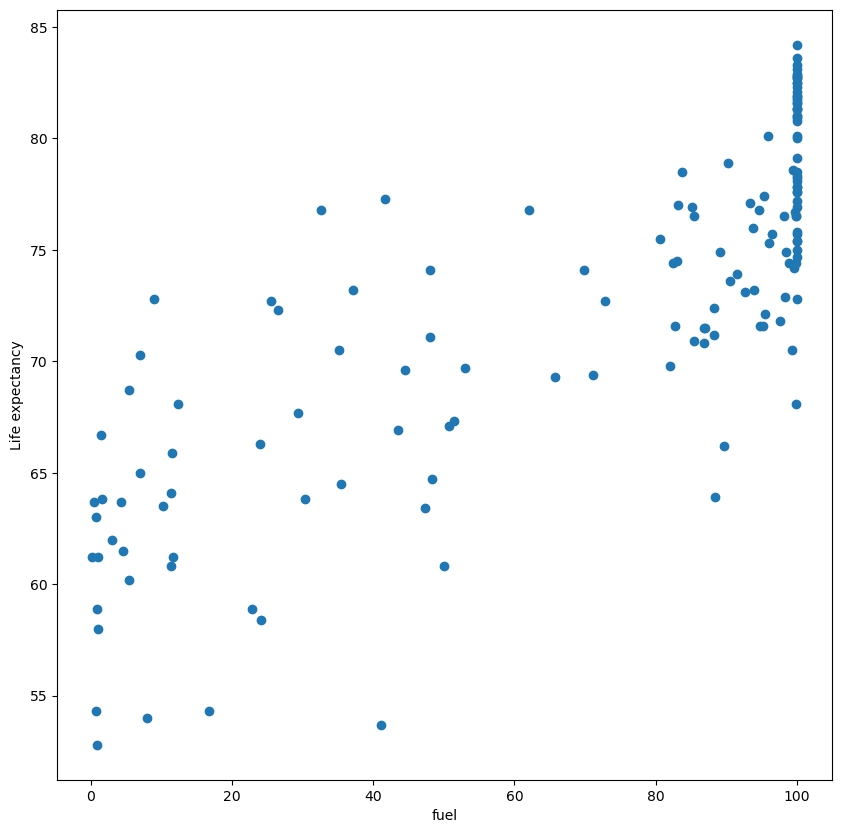

ValueError: Could not interpret value `Life expectancy` for parameter `y`

<Figure size 1000x1000 with 0 Axes>

In [353]:
# plot all
plt.figure(figsize=(10,10))
plt.ylabel('Life expectancy')
plt.xlabel('fuel')
plt.scatter(X, y)
plt.show()

# this seems nicer to use tbh.
plt.figure(figsize=(10,10))
sns.scatterplot(x='fuel', y='Life expectancy', data=df)

In [354]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [355]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [356]:
# fit it to our data
myreg.fit(X_train, y_train)

LinearRegression()

In [357]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [358]:
a

array([0.15726935])

In [359]:
b

61.83332638898171

In [360]:
y_predicted = myreg.predict(X_test)

In [361]:
test1 = myreg.predict([[4000]])
test1

array([690.91074129])

Text(0, 0.5, 'Life expectancy')

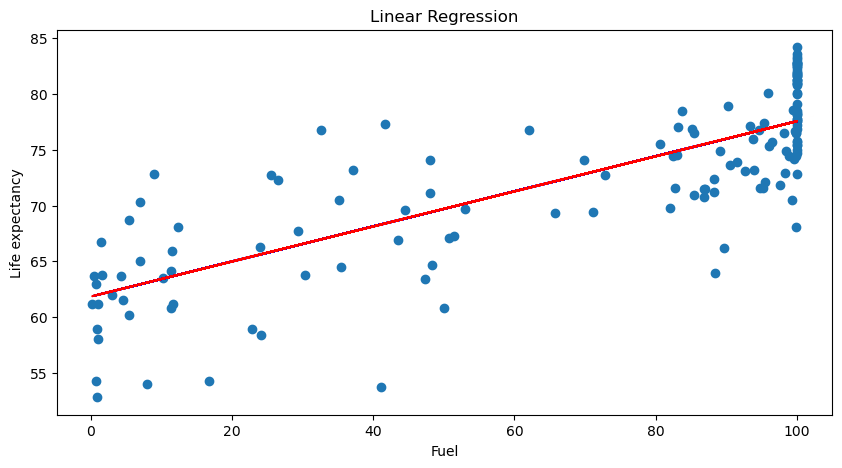

In [362]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y)
plt.plot(X_train, (a*X_train) + b, color='blue')
plt.plot(X_test, y_predicted, color='red')
plt.xlabel('Fuel')
plt.ylabel('Life expectancy')

In [363]:
R2 = myreg.score(X, y)
R2

0.6523290229152598

# Poly lort

In [375]:
#X = df[['health', 'fuel']] hvordan tilføjer man flere features?
X = df[['fuel']]
y = df['Life_expectancy']

In [376]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [377]:
#se hvilke af de random man tester 
X_test

,fuel
7,100.0
24,0.2
27,100.0
119,100.0
142,6.9
51,100.0
43,100.0
22,89.1
112,37.2
26,22.8


In [378]:
#se hvilke af de random man trainer  
X_train

,fuel
76,25.5
18,88.3
45,100.0
50,30.3
44,51.4
...,...
9,98.3
103,69.8
67,99.9
117,0.8


In [379]:
# Fitting Polynomial Regression to the dataset
poly_model = PolynomialFeatures(degree=5)
X_poly = poly_model.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [380]:
y_predict = pol_reg.predict(X_poly)

In [381]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
    plt.scatter(X, y, color='red')
    plt.plot(X, y_predict , color='blue')
    plt.title('Polynomia Regression)')
    plt.xlabel('Fuel')
    plt.ylabel('Life Excp')
    plt.show()
    return


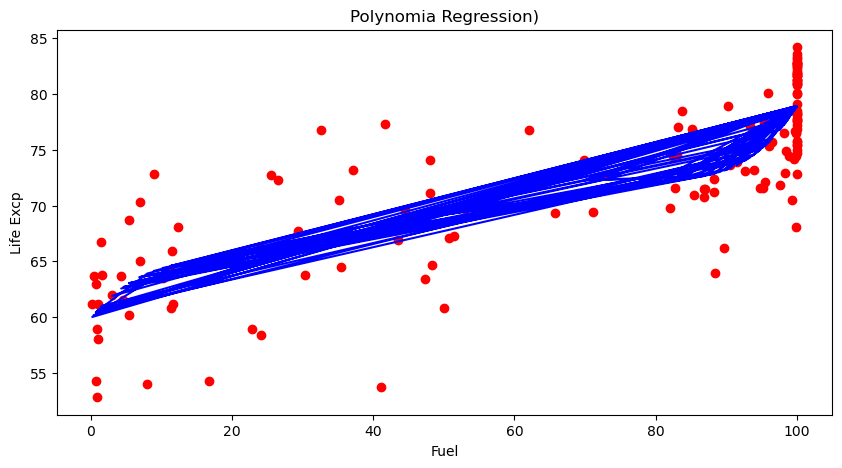

In [371]:
viz_polymonial()

In [372]:
# Additional feature
# Making the plot line more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_model.fit_transform(X_grid)), color='blue')
    plt.title('Polynomia Regression)')
    plt.xlabel('Fuel')
    plt.ylabel('Life Excp')
    plt.show()
    return

In [373]:
viz_polymonial_smooth()

TypeError: arange() not supported for inputs with DType <class 'numpy.dtype[str_]'>.

In [374]:
#måske have det her med men så tag det dårlige eksempel med fra hendes bog 
# Predicting a new result with Linear Regression
#lin_reg.predict([[80.80]])

In [287]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_model.fit_transform([[80.80]]))

array([72.33448463])

# Lasso Ridge

In [288]:
#preview
features = df.columns[6:11]
target = df.columns[19]

#X and y values
X2 = df[features].values
y2 = df[target].values

In [289]:
#preview
#features = [['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio']]
#target = df['Life expectancy']

In [290]:
#X = df[['health', 'fuel']] hvordan tilføjer man flere features?
#X2 = df[['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio']]
#y2 = df['Life expectancy']

In [291]:
#splot
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (102, 5)
The dimension of X_test is (44, 5)


In [292]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


The train score for lr model is 0.5784000848720652
The test score for lr model is 0.5724655613363079

Ridge Model............................................

The train score for ridge model is 0.5687059909081791
The test score for ridge model is 0.592524587512304


NameError: name 'rr100' is not defined

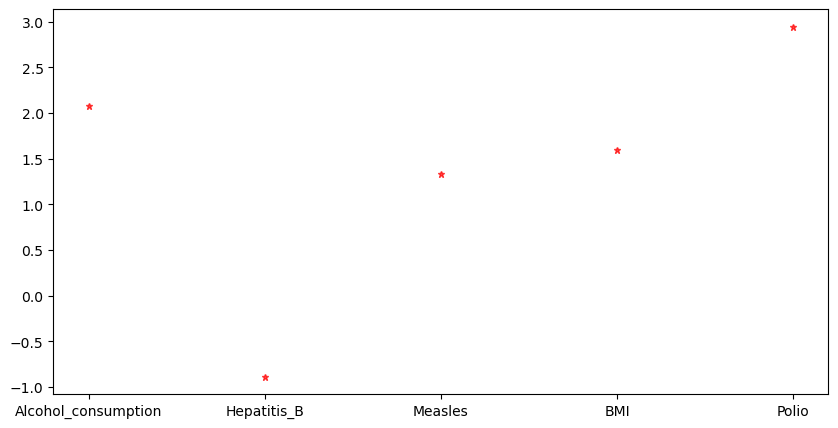

In [293]:
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Lasso

In [294]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.09260300797704057


<Axes: >

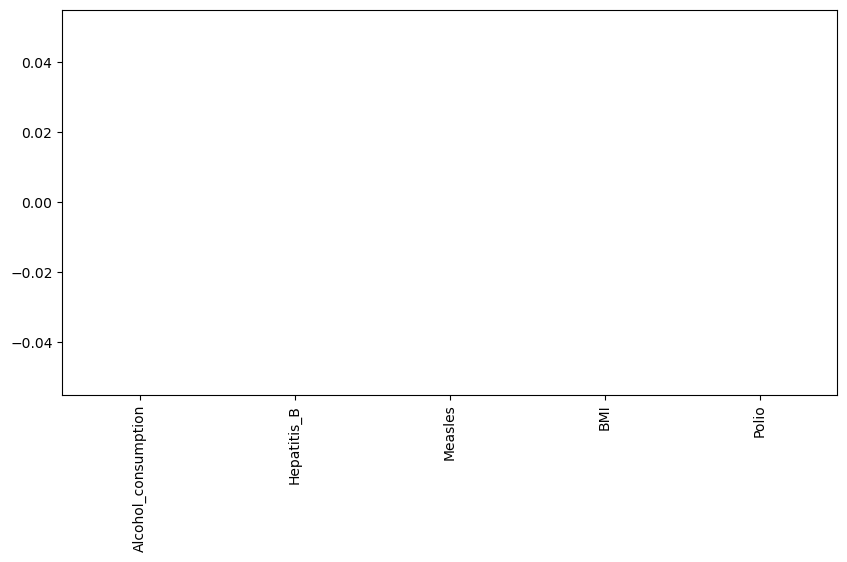

In [295]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")


In [296]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))


0.5783720823169657
0.5741781536434971


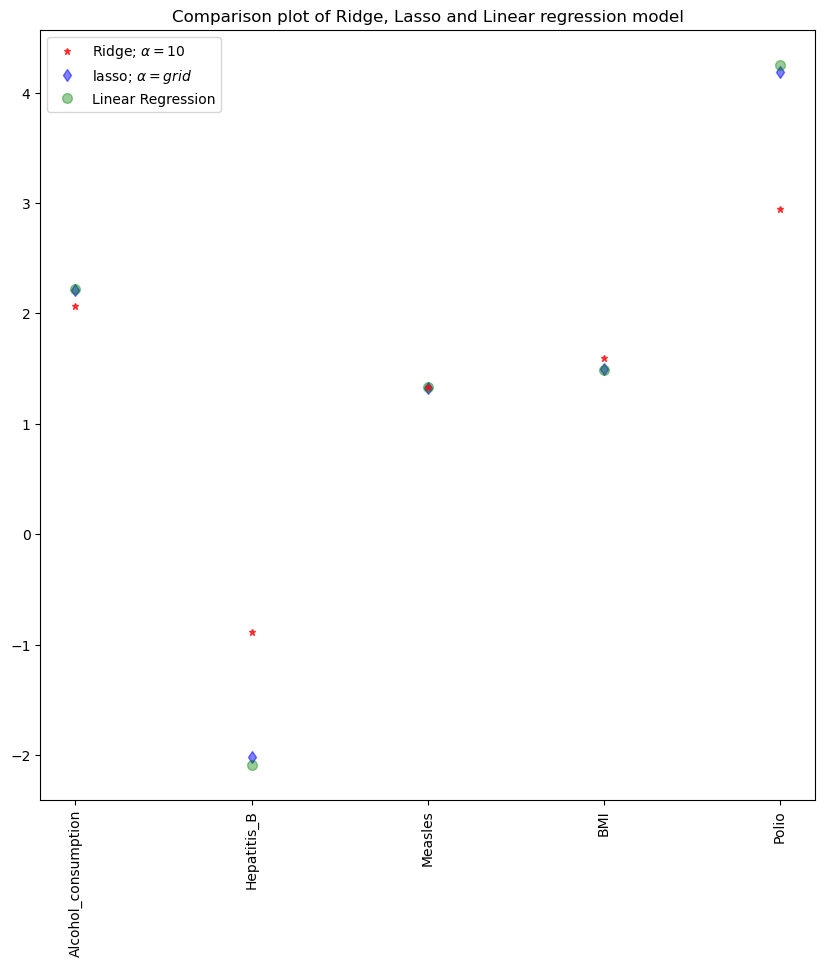

In [297]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


In [298]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.5781700015584146
The train score for ridge model is 0.5772266856797905


In [299]:
#https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression